# **Konten**

* [Pendahuluan](#intro)
* [Tujuan](#intro)
* [Tahapan](#intro)
* [Tahap 1. Eksplorasi Data](#data_review)
    * [Kesimpulan](#header_style)
* [Tahap 2. Transformasi data](#data_preprocessing)
    * [2.1 Education](#header_style)
    * [2.2 Children](#missing_values)
    * [2.3 Days_Employed](#duplicates)
    * [2.4 Dob_Years](#data_preprocessing_conclusions)
    * [2.5 Family_Status](#data_preprocessing_conclusions)
    * [2.6 Gender](#data_preprocessing_conclusions)
    * [2.7 Income_Type](#data_preprocessing_conclusions)
    * [2.8 Memperbaiki Data Duplikat](#data_preprocessing_conclusions)
*[Tahap 3. Bekerja Dengan Nilai Yang Hilang ](#data_preprocessing_conclusions)
    * [3.1 Memperbaiki nilai yang hilang di total_income](#data_preprocessing_conclusions)
    * [3.2 Memperbaiki nilai di days_employed](#data_preprocessing_conclusions)
    * [Kesimpulan](#data_preprocessing_conclusions)    
* [Tahap 4. Pengkategorian Data](#hypotheses)
    * [4.1 Kategorisasi Kolom Family Status](#activity)
    * [4.2 Kategorisasi Kolom Total Income](#week)
    * [4.3 Kategorisasi Kolom Purpose](#genre)
    * [4.4 Mengganti Atribut Nilai Kolom Debt](#genre)
    * [4.4 Kesimpulan](#genre)
* [Tahap 5. Memeriksa Hipotesis](#hypotheses)
    * [5.1 Hipotesis I : Terdapat korelasi antara memiliki anak dengan probabilitas melakukan gagal bayar pinjaman](#activity)
    * [5.2 Hipotesis II : Terdapat korelasi antara status keluarga dengan probabilitas melakukan gagal bayar pinjaman](#week)
    * [5.3 Hipotesis III : Terdapat korelasi antara tingkat pendapatan dengan probabilitas melakukan gagal bayar pinjaman](#genre)
    * [5.4 Hipotesis IV : Terdapat korelasi antara tujuan kredit dalam memengaruhi persentase gagal bayar](#genre)
* [Tahap 6. Kesimpulan Umum](#hypotheses)

# **Pendahuluan**
Kita akan menyiapkan laporan untuk divisi kredit dari suatu bank. Saat ini pihak bank sudah memiliki beberapa data mengenai kelayakan kredit nasabah. Hasil akhir yang diharapkan oleh divisi kredit yaitu terkait identifikasi dari ada atau tidaknya pengaruh atas sejumlah variabel terhadap probabilitas gagal bayar dalam pelunasan pinjaman. Laporan kita akan dipertimbangkan pada saat membuat **penilaian kredit** untuk calon nasabah. **Penilaian kredit** digunakan untuk mengevaluasi kemampuan calon peminjam untuk melunasi pinjaman mereka.
Kita akan mempelajari dataset kredit nasabah untuk menguji hipotesis - hipotesis di bawah ini setelah membandingkan karakteristik atas kecenderungan seorang nasabah dapat mengalami gagal bayar pinjaman.

# **Tujuan**
Menguji 4 (empat) hipotesis:
1. Terdapat korelasi antara jumlah anak dalam suatu keluarga terhadap probabilitas gagal bayar pinjaman
2. Terdapat korelasi antara status keluarga terhadap probabilitas gagal bayar pinjaman
3. Terdapat korelasi antara tingkat penghasilan nasabah terhadap probabilitas gagal bayar pinjaman
4. Terdapat korelasi antara tujuan pengambilan kredit terhadap probabilitas gagal bayar pinjaman

# **Tahapan**
Data yang memuat tentang karakteristik nasabah disimpan dalam *file* `/datasets/credit_scoring_eng.csv`. Informasi mengenai kualitas input terhadap data - data yang ada tersebut tidak tersedia, sehingga kita perlu melakukan pemeriksaan dan validasi keabsahan data terlebih dahulu sebelum menguji hipotesis.

Mula - mula kita akan melihat seberapa signifikan masalah yang kita hadapi terkait kualitas data - data yang kita miliki tersebut melalui akitifitas pra-pemrosesan data. Proyek ini akan terdiri dari empat tahap:
 1. Eksplorasi Data
 2. Transformasi Data
 3. Pengkategorian Data
 4. Memeriksa hipotesis

In [19]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [20]:
# Muat semua *library*
import pandas as pd
import numpy as np


In [21]:
# Muat datanya
df = pd.read_excel('/kaggle/input/credit-score-data/credit_scoring_eng.xlsx')
df

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding
...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,-4529.316663,43,secondary education,1,civil partnership,1,F,business,0,35966.698,housing transactions
21521,0,343937.404131,67,secondary education,1,married,0,F,retiree,0,24959.969,purchase of a car
21522,1,-2113.346888,38,secondary education,1,civil partnership,1,M,employee,1,14347.61,property
21523,3,-3112.481705,38,secondary education,1,married,0,M,employee,1,39054.888,buying my own car


# **Tahap 1. Eksplorasi data**

Sekarang saatnya kami menjelajahi data. Kami perlu melihat berapa banyak kolom dan baris yang dimiliki oleh data, serta mencermati beberapa baris data untuk memeriksa potensi masalah dengan data.

Berikut deskripsi untuk masing-masing kolom data
- `children` - jumlah anak dalam keluarga
- `days_employed` - pengalaman kerja nasabah dalam hari
- `dob_years` - usia nasabah dalam tahun
- `education` - tingkat pendidikan nasabah
- `education_id` - pengidentifikasi untuk tingkat pendidikan nasabah
- `family_status` - pengidentifikasi untuk status perkawinan nasabah
- `family_status_id` - tanda pengenal status perkawinan
- `gender` - jenis kelamin nasabah
- `income_type` - jenis pekerjaan
- `debt` - apakah nasabah pernah melakukan gagal bayar pinjaman
- `total_income` - pendapatan bulanan
- `purpose` - tujuan mendapatkan pinjaman


In [22]:
# Mari kita lihat berapa banyak baris dan kolom yang dimiliki oleh dataset kita
df.shape

(21525, 12)

In [23]:
# Mari tampilkan N baris pertama
df.head(5)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding


**Temuan :**

* Masih ditemukan sejumlah kolom baris yang kosong (NaN)
* Nilai pada kolom **days_employed** kontras dengan satuan hari, sehingga harus bernilai bulat
* Terdapat kejanggalan pada data dimana seharusnya pengalaman kerja nasabah (**days_employed**) tidak menunjukkan nilai negatif
* Terdapat nilai yang janggal pada kolom **days_employed**, dimana ketika nilai tersebut disetahunkan maka akan lebih besar dibandingkan kolom **dob_years** (usia nasabah)
* Terdapat ketidakseragaman penyajian data pada kolom **education**, yaitu ditemukan data berformat kapital dan non-kapital secara bersamaan
* Beberapa kolom, termasuk **purpose**, **family_status**, dan lain-lain memuat sejumlah statement yang terindikasi bermakna sama (e.g. purchase of the house and housing transactions) namun disajikan dengan istilah berbeda, sehingga akan sangat membantu apabila nantinya dilakukan pengelompokan data

In [24]:
# Dapatkan informasi data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  object 
 11  purpose           21525 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 2.0+ MB


In [25]:
df.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt
count,21525.000000,19351.000000,21525.000000,21525.000000,21525.000000,21525.000000
mean,0.538908,63046.497661,43.293380,0.817236,0.972544,0.080883
std,1.381587,140827.311974,12.574584,0.548138,1.420324,0.272661
min,-1.000000,-18388.949901,0.000000,0.000000,0.000000,0.000000
25%,0.000000,-2747.423625,33.000000,1.000000,0.000000,0.000000
50%,0.000000,-1203.369529,42.000000,1.000000,0.000000,0.000000
75%,1.000000,-291.095954,53.000000,1.000000,1.000000,0.000000
max,20.000000,401755.400475,75.000000,4.000000,4.000000,1.000000


**Kesimpulan Sementara**

1. Terdapat 2 kolom dengan baris data yang hilang dari total 21.525 baris data, yaitu **days_employed** dan **total_income**.
2. Hampir lebih dari 50% nasabah kita didominasi oleh status tidak memiliki anak
3. Lebih dari 70% data nasabah kita untuk kolom days_employed terbukti memiliki nilai baris yang bermasalah
4. Dominan usia nasabah - nasabah kita berada di rentang 40 sampai dengan 50 tahun
5. 75% nasabah kita merupakan lulusan SMA (secondary education)
6. Status keluarga yang telah menikah merupakan yang paling dominan untuk nasabah - nasabah kita
7. Lebih dari 70% nasabah - nasabah kita pada dasarnya tidak pernah bermasalah dengan gagal bayar pinjaman
8. Meskipun begitu kita melihat bahwa rata-rata tingkat pendapatan nasabah - nasabah kita cenderung rendah, bahkan 75% nasabah memiliki tingkat pendapatan dibahwa 40.000

In [26]:
# Mari kita lihat tabel yang telah difilter dengan nilai yang hilang di kolom pertama yang mengandung data yang hilang

days_emp_missing = df[pd.isnull(df['days_employed'])]
days_emp_missing.sort_values(by = 'dob_years', ascending = False)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
18664,1,NaN,73,secondary education,1,married,0,F,retiree,0,NaN,supplementary education
10563,0,NaN,72,Secondary Education,1,unmarried,4,F,retiree,1,NaN,car purchase
13864,0,NaN,72,secondary education,1,married,0,F,business,0,NaN,purchase of a car
6537,0,NaN,71,Secondary Education,1,civil partnership,1,F,retiree,0,NaN,having a wedding
8456,0,NaN,71,secondary education,1,married,0,M,retiree,0,NaN,transactions with commercial real estate
...,...,...,...,...,...,...,...,...,...,...,...,...
12403,3,NaN,0,secondary education,1,married,0,M,employee,0,NaN,transactions with commercial real estate
19829,0,NaN,0,secondary education,1,married,0,F,employee,0,NaN,housing
6670,0,NaN,0,Bachelor's Degree,0,divorced,3,F,retiree,0,NaN,buy residential real estate
4064,1,NaN,0,secondary education,1,civil partnership,1,M,business,0,NaN,housing renovation


In [27]:
days_emp_not_missing = df[~ pd.isnull(df['days_employed'])]
days_emp_not_missing.sort_values(by = 'dob_years', ascending = False)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
8880,0,-1678.969771,75,secondary education,1,widow / widower,2,F,civil servant,0,24525.224,to become educated
3460,0,344623.836105,74,secondary education,1,married,0,M,retiree,0,8760.759,transactions with my real estate
11532,0,-6682.867814,74,secondary education,1,civil partnership,1,F,employee,0,15831.345,to have a wedding
4895,0,341528.126150,74,bachelor's degree,0,married,0,F,retiree,0,21589.657000000007,purchase of my own house
19642,0,380150.387046,74,secondary education,1,widow / widower,2,F,retiree,0,7214.326999999998,car purchase
...,...,...,...,...,...,...,...,...,...,...,...,...
9151,0,-1551.380402,0,bachelor's degree,0,unmarried,4,F,employee,0,33539.494,getting higher education
8416,2,-1371.207222,0,secondary education,1,married,0,M,employee,0,28662.114,purchase of the house for my family
14659,0,394949.344851,0,secondary education,1,unmarried,4,F,retiree,0,5595.911999999998,housing
9062,1,-1720.866870,0,secondary education,1,married,0,F,employee,0,35247.736000000004,profile education


In [28]:
# Mari kita lihat tabel yang telah difilter dengan nilai yang hilang di kolom kedua yang mengandung data yang hilang

df_tmp_missing = df[pd.isnull(df['total_income'])]
df_tmp_missing.sort_values(by = 'dob_years', ascending = False)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
18664,1,NaN,73,secondary education,1,married,0,F,retiree,0,NaN,supplementary education
10563,0,NaN,72,Secondary Education,1,unmarried,4,F,retiree,1,NaN,car purchase
13864,0,NaN,72,secondary education,1,married,0,F,business,0,NaN,purchase of a car
6537,0,NaN,71,Secondary Education,1,civil partnership,1,F,retiree,0,NaN,having a wedding
8456,0,NaN,71,secondary education,1,married,0,M,retiree,0,NaN,transactions with commercial real estate
...,...,...,...,...,...,...,...,...,...,...,...,...
12403,3,NaN,0,secondary education,1,married,0,M,employee,0,NaN,transactions with commercial real estate
19829,0,NaN,0,secondary education,1,married,0,F,employee,0,NaN,housing
6670,0,NaN,0,Bachelor's Degree,0,divorced,3,F,retiree,0,NaN,buy residential real estate
4064,1,NaN,0,secondary education,1,civil partnership,1,M,business,0,NaN,housing renovation


In [29]:
# Mari kita munculkan dataset dengan menggunakan filter untuk kondisi kolom total_income dan days_employed yang null

df_missing = df[pd.isnull(df['total_income']) & pd.isnull(df['days_employed'])]
df_missing.sort_values(by = 'dob_years', ascending = False)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
18664,1,NaN,73,secondary education,1,married,0,F,retiree,0,NaN,supplementary education
10563,0,NaN,72,Secondary Education,1,unmarried,4,F,retiree,1,NaN,car purchase
13864,0,NaN,72,secondary education,1,married,0,F,business,0,NaN,purchase of a car
6537,0,NaN,71,Secondary Education,1,civil partnership,1,F,retiree,0,NaN,having a wedding
8456,0,NaN,71,secondary education,1,married,0,M,retiree,0,NaN,transactions with commercial real estate
...,...,...,...,...,...,...,...,...,...,...,...,...
12403,3,NaN,0,secondary education,1,married,0,M,employee,0,NaN,transactions with commercial real estate
19829,0,NaN,0,secondary education,1,married,0,F,employee,0,NaN,housing
6670,0,NaN,0,Bachelor's Degree,0,divorced,3,F,retiree,0,NaN,buy residential real estate
4064,1,NaN,0,secondary education,1,civil partnership,1,M,business,0,NaN,housing renovation


In [30]:
# Mari kita munculkan dataset hanya dengan kondisi nilai baris yang tidak null

df_not_missing = df[~pd.isnull(df['total_income']) & ~pd.isnull(df['days_employed'])]
df_not_missing.sort_values(by = 'dob_years', ascending = False)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
8880,0,-1678.969771,75,secondary education,1,widow / widower,2,F,civil servant,0,24525.224,to become educated
3460,0,344623.836105,74,secondary education,1,married,0,M,retiree,0,8760.759,transactions with my real estate
11532,0,-6682.867814,74,secondary education,1,civil partnership,1,F,employee,0,15831.345,to have a wedding
4895,0,341528.126150,74,bachelor's degree,0,married,0,F,retiree,0,21589.657000000007,purchase of my own house
19642,0,380150.387046,74,secondary education,1,widow / widower,2,F,retiree,0,7214.326999999998,car purchase
...,...,...,...,...,...,...,...,...,...,...,...,...
9151,0,-1551.380402,0,bachelor's degree,0,unmarried,4,F,employee,0,33539.494,getting higher education
8416,2,-1371.207222,0,secondary education,1,married,0,M,employee,0,28662.114,purchase of the house for my family
14659,0,394949.344851,0,secondary education,1,unmarried,4,F,retiree,0,5595.911999999998,housing
9062,1,-1720.866870,0,secondary education,1,married,0,F,employee,0,35247.736000000004,profile education


**Kesimpulan sementara**

* Baris yang hilang untuk kedua kolom ternyata sejajar dan juga memiliki jumlah yang sama, membuktikan adanya simetrisitas baris null
* Persentase nilai yang hilang terhadap keseluruhan data adalah sebesar 10%, membuktikan bahwa jumlah ini merupakan angka yang signifikan sehingga akan lebih baik apabila nilai hilang tersebut diisi alih - alih dihilangkan

Pada langkah selanjutnya kita akan mempertimbangkan apakah data yang hilang untuk kedua kolom tersebut berperilaku acak atau ternyata menunjukkan suatu pola khusus berdasarkan karakteristik nasabah tertentu, seperti jenis pekerjaan atau variabel lainnya. Apabila ternyata kita berhasil mengidentifikasi suatu pola, maka kita akan memutuskan karakteristik mana yang paling mungkin merupakan penyebabnya. Kemudian kita akan memeriksa apakah ada ketergantungan nilai yang hilang pada nilai indikator lain dengan kolom-kolom yang mengidentifikasikan karakteristik tertentu nasabah.

In [31]:
# Munculkan kembali dataset
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding


In [32]:
# Mari kita periksa nasabah yang tidak memiliki data tentang karakteristik yang teridentifikasi dan kolom dengan nilai yang hilang

edu_miss = df_tmp_missing['gender'].value_counts()
print(edu_miss)

gender
F    1484
M     690
Name: count, dtype: int64


In [33]:
# Membuat iterasi untuk memunculkan perbandingan antara 2 dataset

for i in list(days_emp_missing):
    print(i, days_emp_missing[i].nunique(), days_emp_not_missing[i].nunique())

children 8 8
days_employed 0 19351
dob_years 56 58
education 12 15
education_id 4 5
family_status 5 5
family_status_id 5 5
gender 2 3
income_type 5 8
debt 2 2
total_income 0 19348
purpose 38 38


In [36]:
# Membuat perbandingan antara rata-rata dari 2 dataset

numerical_columns_missing = days_emp_missing.select_dtypes(include=['int64', 'float64'])
numerical_columns_not_missing = days_emp_not_missing.select_dtypes(include=['int64', 'float64'])

# Hitung median dari kolom numerik
median_missing = numerical_columns_missing.median()
median_not_missing = numerical_columns_not_missing.median()

print("Median for Missing Data:")
print(median_missing)
print()

print("Median for Not Missing Data:")
median_not_missing

Median for Missing Data:
children             0.0
days_employed        NaN
dob_years           43.0
education_id         1.0
family_status_id     0.0
debt                 0.0
dtype: float64

Median for Not Missing Data:


children               0.000000
days_employed      -1203.369529
dob_years             42.000000
education_id           1.000000
family_status_id       0.000000
debt                   0.000000
dtype: float64

**Temuan**

Dari hasil identifikasi diatas kita telah membuktikan tidak adanya pola khusus pada dataset yang telah kita filter dengan kondisi null (**days_emp_missing**) terhadap dataset **days_emp_not_missing**, seperti misalnya variasi nilai dari suatu kolom yang berbeda secara signifikan untuk sejumlah kolom ataupun karakteristik nasabah. Artinya kita dapat menyimpulkan bahwa baris yang null pada dasarnya berperilaku acak.

Selain itu apabila kita membandingkan nilai rata - rata dari seluruh kolom dengan menggunakan perbandingan untuk ke-2 dataset, kita menemukan bahwa tidak ada perbedaan yang signifikan dari keduanya

**Dataset Dengan Filter Nilai Baris Yang Null**
* children           : dominan belum punya anak
* dob_years          : dominan usia 43 tahun
* education          : dominan untuk pendidikan menengah
* family_status      : dominan untuk status nasabah yang telah menikah
* gender             : didominasi oleh nasabah wanita
* debt               : dominan untuk nasabah - nasabah yang tidak memiliki hutang
* income_type        : dominan untuk nasabah dengan status employee

**Dataset Dengan Filter Nilai Baris yang Not Null**
* children           : dominan belum punya anak
* dob_years          : dominan usia 43 tahun
* education          : dominan untuk pendidikan menengah
* family_status      : dominan untuk status nasabah yang telah menikah
* gender             : didominasi oleh nasabah wanita
* debt               : dominan untuk nasabah - nasabah yang tidak memiliki hutang
* income_type        : dominan untuk nasabah dengan status employee

In [37]:
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding


In [38]:
# Mari kita cek distribusi kolom untuk dataset utuh
df_count = df['education'].value_counts()
df_percent = df['education'].value_counts(normalize=True).mul(100).round(2).astype(str)+"%"
pd.DataFrame(data={'percent%' : df_percent, "count" : df_count}).rename_axis("unique")


,percent%,count
unique,,
secondary education,63.88%,13750
bachelor's degree,21.92%,4718
SECONDARY EDUCATION,3.59%,772
Secondary Education,3.3%,711
some college,3.1%,668
BACHELOR'S DEGREE,1.27%,274
Bachelor's Degree,1.25%,268
primary education,1.16%,250
Some College,0.22%,47


In [39]:
# Mari kita cek distribusi kolom dengan filter kondisi nilai null
df_missing_count = df_missing['education'].value_counts()
df_missing_percent = df_missing['education'].value_counts(normalize=True).mul(100).round(2).astype(str)+"%"
pd.DataFrame(data={'percent%' : df_missing_percent, "count" : df_missing_count}).rename_axis("unique")

,percent%,count
unique,,
secondary education,64.77%,1408
bachelor's degree,22.82%,496
SECONDARY EDUCATION,3.08%,67
Secondary Education,2.99%,65
some college,2.53%,55
Bachelor's Degree,1.15%,25
BACHELOR'S DEGREE,1.06%,23
primary education,0.87%,19
Some College,0.32%,7


In [40]:
# Mari kita cek distribusi kolom dengan filter hanya untuk kondisi nilai yang tidak null
df_not_missing_count = df_not_missing['education'].value_counts()
df_not_missing_percent = df_not_missing['education'].value_counts(normalize=True).mul(100).round(2).astype(str)+"%"
pd.DataFrame(data={'percent%' : df_not_missing_percent, "count" : df_not_missing_count}).rename_axis("unique")

,percent%,count
unique,,
secondary education,63.78%,12342
bachelor's degree,21.82%,4222
SECONDARY EDUCATION,3.64%,705
Secondary Education,3.34%,646
some college,3.17%,613
BACHELOR'S DEGREE,1.3%,251
Bachelor's Degree,1.26%,243
primary education,1.19%,231
Some College,0.21%,40


**Kesimpulan sementara**

Distribusi dalam dataset asli mirip dengan distribusi tabel yang telah difilter, dimana urutan untuk masing - masing nilai dari jumlah yang tertinggi hingga terendah adalah sama

**Kesimpulan Akhir**

Apabila dilakukan komparasi antara full dataset dan dataset yang telah difilter berdasarkan nilai yang hilang, maka urutan nilai yang dominan antara kedua dataset kurang lebih sama, dimana perbedaan hanya terletak pada kuantitas. Hal ini membuktikan bahwa apabila pola yang hendak dicari diinterpretasikan berdasarkan karakteristik nasabah (customer behaviour) maka akan sulit untuk dapat menemukan pola atas data yang hilang. Hanya saja secara eksplisit dapat dipahami bahwa kolom days_employed dan total_income memiliki missing value yang simetris

# **Tahap 2. Transformasi data**

Mari kita perhatikan setiap kolom untuk melihat masalah apa yang mungkin dimiliki mereka.

## **2.1 Education**

In [41]:
# Mari kita lihat semua nilai di kolom pendidikan untuk memeriksa ejaan apa yang perlu diperbaiki

edu = df['education'].unique()
edu

array(["bachelor's degree", 'secondary education', 'Secondary Education',
       'SECONDARY EDUCATION', "BACHELOR'S DEGREE", 'some college',
       'primary education', "Bachelor's Degree", 'SOME COLLEGE',
       'Some College', 'PRIMARY EDUCATION', 'Primary Education',
       'Graduate Degree', 'GRADUATE DEGREE', 'graduate degree'],
      dtype=object)

**Argument**

Kolom education memiliki tingkat variasi nilai yang tinggi, namun apabila diperhatikan lebih detail masing - masing nilai hanya bervariasi berdasarkan cara penulisan, dimana untuk sejumlah nilai yang sebenarnya memliki kesamaan interpretasi ternyata ditulis menggunakan huruf kapital sedangkan yang lainnya tidak. Untuk itu secara esensi nilai pada kolom education pada dasarnya hanya memiliki 5 variasi nilai sebagai berikut :

* primary education
* secondary education
* some college
* bachelor's degree
* graduate degree

In [42]:
# Perbaiki pencatatan jika diperlukan

df['education'] = df['education'].str.lower()
df['education'].value_counts()

education
secondary education    15233
bachelor's degree       5260
some college             744
primary education        282
graduate degree            6
Name: count, dtype: int64

In [43]:
# Periksa semua nilai di kolom untuk memastikan bahwa kita telah memperbaikinya dengan tepat

edu = df['education'].unique()
edu

array(["bachelor's degree", 'secondary education', 'some college',
       'primary education', 'graduate degree'], dtype=object)

**Kesimpulan Akhir**

Kita telah memperbaiki variasi nilai pada kolom education dengan mempertimbangkan argumen yang ada sebelumnya, sehingga saat ini nilai pada kolom education yang pada awalnya memiliki 15 variasi nilai dapat dipersempit dengan hanya menjadi 5 variasi nilai namun dengan masih mempertahankan karakteristik kolom tersebut

## **2.2. Children**

In [44]:
# Mari kita lihat distribusi nilai pada kolom `children`

child = df['children'].value_counts()
child

children
 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: count, dtype: int64

**Argument**

1. Terdapat angka yang janggal pada kolom children, dimana pola distribusi menunjukkan bahwa terdapat 47 nasabah yang memiliki jumlah anak yang bernilai negatif (-1), untuk itu kita akan memperbaiki nilai tersebut dengan berasumsi bahwa penginput data telah secara keliru menempatkan notasi negatif (-) pada suatu nilai. Dengan mengacu pada asumsi tersebut maka kita akan memperbaiki nilai pada kolom children
2. Terdapat jumlah anak yang tidak wajar (20 anak). Ini mengindikasikan adanya kesalahan dalam penginputan data, dimana jumlah anak yang seharusnya adalah 2 namun terdapat penambahan angka 0 sehingga pengimplementasiannya didalam kolom menjadi tertulis 20. Kita akan ubah nilai ini dari yang awalnya 20 menjadi bernilai 2.

Kita perbaiki terlebih dahulu nilai yang bermasalah yaitu untuk entitas angka jumlah anak yang negatif. Pertimbangan awal yang kita gunakan adalah bahwa terdapat kesalahan penginputan data, dimana sebetulnya notasi negatif tersebut telah secara tidak sengaja terinput kedalam nilai. Kita akan membuktikan asumsi ini dengan cara menghitung tingkat persentase terhadap status keluarga yang memiliki 1 anak dan kolom yang bermasalah untuk kemudian membandingkan keduanya.

In [45]:
print(df[df['children'] == -1]['family_status'].value_counts(normalize=True))
print()
print(df[df['children'] == 1]['family_status'].value_counts(normalize=True))

family_status
married              0.617021
civil partnership    0.106383
unmarried            0.106383
divorced             0.085106
widow / widower      0.085106
Name: proportion, dtype: float64

family_status
married              0.618929
civil partnership    0.207140
unmarried            0.093192
divorced             0.064757
widow / widower      0.015982
Name: proportion, dtype: float64


Perhatikan distribusi nilai diatas yang menunjukkan bahwa terdapat kemiripan karakteristik atas variasi nilai dari kolom status keluarga untuk kedua kondisi yang kita pertimbangkan. Hal ini membuktikan bahwa pada dasarnya nilai -1 memiliki sebagian besar karakteristik dari kondisi yang kita jadikan acuan. Sebelum kita mengganti nilainya, kita akan menggunakan strategi yang sama untuk memperkuat asumsi kita terhadap nilai bermasalah selanjutnya, untuk kemudian dapat kita ganti nilainya.

In [46]:
print(df[df['children'] == 20]['family_status'].value_counts(normalize=True))
print()
print(df[df['children'] == 0]['family_status'].value_counts(normalize=True))
print()
print(df[df['children'] == 2]['family_status'].value_counts(normalize=True))

family_status
married              0.644737
civil partnership    0.157895
unmarried            0.118421
widow / widower      0.052632
divorced             0.026316
Name: proportion, dtype: float64

family_status
married              0.530073
civil partnership    0.194501
unmarried            0.160082
widow / widower      0.059934
divorced             0.055410
Name: proportion, dtype: float64

family_status
married              0.746959
civil partnership    0.167397
divorced             0.039416
unmarried            0.036496
widow / widower      0.009732
Name: proportion, dtype: float64


Setelah melihat pola distribusi diatas, kita sedikit banyak memperoleh pemahaman bahwa variasi nilai untuk kolom family_status dengan kondisi tidak memiliki anak sebetulnya memiliki sebagian besar karakteristik persentase untuk baris dengan kondisi jumlah anak sebanyak 20. Untuk itu dengan menggunakan asumsi - asumsi yang sudah kita bangun sejak awal maka kita akan melakukan :
1. Mengganti nilai -1 pada kolom children menjadi bernilai 1
2. Mengganti nilai 20 pada kolom yang sama menjadi bernai 0

In [47]:
days_emp_not_missing = df[pd.isnull(df['days_employed'])]
days_emp_not_missing

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,secondary education,1,civil partnership,1,M,retiree,0,NaN,to have a wedding
26,0,NaN,41,secondary education,1,married,0,M,civil servant,0,NaN,education
29,0,NaN,63,secondary education,1,unmarried,4,F,retiree,0,NaN,building a real estate
41,0,NaN,50,secondary education,1,married,0,F,civil servant,0,NaN,second-hand car purchase
55,0,NaN,54,secondary education,1,civil partnership,1,F,retiree,1,NaN,to have a wedding
...,...,...,...,...,...,...,...,...,...,...,...,...
21489,2,NaN,47,secondary education,1,married,0,M,business,0,NaN,purchase of a car
21495,1,NaN,50,secondary education,1,civil partnership,1,F,employee,0,NaN,wedding ceremony
21497,0,NaN,48,bachelor's degree,0,married,0,F,business,0,NaN,building a property
21502,1,NaN,42,secondary education,1,married,0,F,employee,0,NaN,building a real estate


In [48]:
# Mengidentifikasi nilai 0 pada kolom dob_years

fill_dob_years = df['children'] == 20

# Number of outliers for the age attribute
df_dob_years = df.loc[fill_dob_years]

df_dob_years.sort_values(by = 'days_employed', ascending = False)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
13489,20,385267.263676,62,secondary education,1,civil partnership,1,F,retiree,0,30755.372000000007,transactions with commercial real estate
14355,20,378510.823821,56,secondary education,1,married,0,F,retiree,0,20471.541,second-hand car purchase
5349,20,361744.836360,64,secondary education,1,widow / widower,2,F,retiree,0,13108.291,housing transactions
7789,20,360485.069162,55,secondary education,1,married,0,F,retiree,0,22180.281000000006,construction of own property
5362,20,355898.021316,69,secondary education,1,married,0,M,retiree,0,22172.653,cars
...,...,...,...,...,...,...,...,...,...,...,...,...
12909,20,NaN,25,secondary education,1,married,0,M,employee,0,NaN,housing transactions
15976,20,NaN,39,secondary education,1,unmarried,4,F,employee,0,NaN,buy real estate
17286,20,NaN,50,bachelor's degree,0,divorced,3,F,employee,0,NaN,buy commercial real estate
19774,20,NaN,59,secondary education,1,civil partnership,1,F,retiree,0,NaN,to have a wedding


In [49]:
df.loc[[13489,21390, 14355, 19774]]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
13489,20,385267.263676,62,secondary education,1,civil partnership,1,F,retiree,0,30755.372000000007,transactions with commercial real estate
21390,20,NaN,53,secondary education,1,married,0,M,business,0,NaN,buy residential real estate
14355,20,378510.823821,56,secondary education,1,married,0,F,retiree,0,20471.541,second-hand car purchase
19774,20,NaN,59,secondary education,1,civil partnership,1,F,retiree,0,NaN,to have a wedding


In [50]:
# Memperbaiki nilai pada kolom children = -1 menjadi children = 1 dan children = 20 menjadi children = 2

df.loc[df['children'] == 20, 'children'] = 2
df.loc[df['children'] == -1, 'children'] = 1
df['children'].value_counts()

children
0    14149
1     4865
2     2131
3      330
4       41
5        9
Name: count, dtype: int64

In [51]:
df.loc[[13489,21390, 14355, 19774]]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
13489,2,385267.263676,62,secondary education,1,civil partnership,1,F,retiree,0,30755.372000000007,transactions with commercial real estate
21390,2,NaN,53,secondary education,1,married,0,M,business,0,NaN,buy residential real estate
14355,2,378510.823821,56,secondary education,1,married,0,F,retiree,0,20471.541,second-hand car purchase
19774,2,NaN,59,secondary education,1,civil partnership,1,F,retiree,0,NaN,to have a wedding


In [52]:
days_emp_not_missing = df[pd.isnull(df['days_employed'])]
days_emp_not_missing

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,secondary education,1,civil partnership,1,M,retiree,0,NaN,to have a wedding
26,0,NaN,41,secondary education,1,married,0,M,civil servant,0,NaN,education
29,0,NaN,63,secondary education,1,unmarried,4,F,retiree,0,NaN,building a real estate
41,0,NaN,50,secondary education,1,married,0,F,civil servant,0,NaN,second-hand car purchase
55,0,NaN,54,secondary education,1,civil partnership,1,F,retiree,1,NaN,to have a wedding
...,...,...,...,...,...,...,...,...,...,...,...,...
21489,2,NaN,47,secondary education,1,married,0,M,business,0,NaN,purchase of a car
21495,1,NaN,50,secondary education,1,civil partnership,1,F,employee,0,NaN,wedding ceremony
21497,0,NaN,48,bachelor's degree,0,married,0,F,business,0,NaN,building a property
21502,1,NaN,42,secondary education,1,married,0,F,employee,0,NaN,building a real estate


In [53]:
# Periksa kembali kolom `children` untuk memastikan bahwa semuanya telah diperbaiki

df['children'].unique()

array([1, 0, 3, 2, 4, 5])

**Kesimpulan Akhir**

Kita telah memperbaiki nilai pada kolom children, dimana saat ini sudah tidak ada lagi nasabah yang memiliki jumlah anak bernilai negatif dan diluar batas wajar

## **2.3 Days_Employed**

**Argument**

Kolom days_employed menunjukkan *experience level*  seorang nasabah yang diukur berdasarkan jumlah hari seorang nasabah telah bekerja. Disini kita akan menetapkan suatu batasan kondisi agar nilai pada kolom ini tidak memiliki makna yang bias dan agar setiap nilai yang keliru dapat kita koreksi dengan mengacu pada kondisi dibawah ini :
1. Nilai pada kolom days_employed seharusnya merupakan bilangan integer alih - alih memiliki tipe float
2. Nilai menunjukkan jumlah periode seseorang telah bekerja pada suatu profesi, sehingga **tidak boleh ada angka negatif**
3. *Work experience level* untuk setiap nasabah tentunya dibatasi oleh tingkat usia nasabah tersebut, untuk itu **tidak boleh ada nilai days employed atau years_employed yang lebih besar dari atau sama dengan nilai pada kolom dob_years **  

In [54]:
# Nilai minimum, maksimum dan rata-rata untuk kolom days_employed sebelum konversi tipe data

print(df['days_employed'].min())
print()
print(df['days_employed'].max())
print()
print(df['days_employed'].mean())

-18388.949900568383

401755.40047533

63046.49766147338


In [55]:
# Mengidentifikasi dan menyelesaikan problem 1 : Mengubah tipe data pada kolom days_employed

def to_int(x):
    try:
        return int(x)
    except:
        return np.nan

df['days_employed'] =df['days_employed'].apply(to_int)

try:
    df['days_employed'] = df['days_employed'].astype(float).astype('Int64')
    print('Berhasil mengubah tipe data pada kolom days_employed')
except:
    print('Kita tidak bisa mengubah tipe data float ke int16')
    print('coba cara lain')

Berhasil mengubah tipe data pada kolom days_employed


In [56]:
# Nilai minimum, maksimum dan rata-rata untuk kolom days_employed setelah konversi tipe data

print(df['days_employed'].min())
print()
print(df['days_employed'].max())
print()
print(df['days_employed'].mean())

-18388

401755

63046.81871737895


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   children          21525 non-null  int64 
 1   days_employed     19351 non-null  Int64 
 2   dob_years         21525 non-null  int64 
 3   education         21525 non-null  object
 4   education_id      21525 non-null  int64 
 5   family_status     21525 non-null  object
 6   family_status_id  21525 non-null  int64 
 7   gender            21525 non-null  object
 8   income_type       21525 non-null  object
 9   debt              21525 non-null  int64 
 10  total_income      19351 non-null  object
 11  purpose           21525 non-null  object
dtypes: Int64(1), int64(5), object(6)
memory usage: 2.0+ MB


**Kesimpulan : Setelah Mengonversi Tipe Data**

Kita telah berhasil melakukan konversi terhadap nilai baris untuk kolom days_employed. Saat ini kita menyadari bahwa terdapat nilai yang janggal pada kolom tersebut, dimana nilai terendah untuk lamanya periode seorang nasabah telah bekerja teridentifikasi bernilai negatif, sedangkan nilai tertingginya adalah selama 401.755 hari atau lebih dari 10 abad. Kita akan melanjutkan dengan terlebih dahulu mengidentifikasi jumlah baris nilai pada kolom days_employed yang negatif

In [58]:
# Temukan jumlah nilai baris dimana days_employed seorang nasabah bernotasi negatif

fill_days_employed_prob1 = (df['days_employed'] < 0)

# Number of outliers for the age attribute
df_days_employed = df.loc[fill_days_employed_prob1]

df_days_employed.sort_values(by = 'days_employed', ascending = True)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
16335,1,-18388,61,secondary education,1,married,0,F,employee,0,29788.629,real estate transactions
4299,0,-17615,61,secondary education,1,married,0,F,business,0,19609.719,purchase of the house
7329,0,-16593,60,bachelor's degree,0,married,0,F,employee,0,19951.655,going to university
17838,0,-16264,59,secondary education,1,married,0,F,employee,0,8198.235,to buy a car
16825,0,-16119,64,secondary education,1,married,0,F,employee,0,14644.43,buy residential real estate
...,...,...,...,...,...,...,...,...,...,...,...,...
2127,1,-34,31,bachelor's degree,0,married,0,F,business,0,14489.279,getting an education
9683,0,-33,43,secondary education,1,unmarried,4,M,employee,1,20568.944,car purchase
6157,2,-30,47,secondary education,1,civil partnership,1,M,business,0,37033.79,wedding ceremony
17437,1,-24,31,secondary education,1,married,0,F,employee,1,26712.386,university education


Kita telah berhasil mengidentifikasi jumlah baris dengan nilai negatif pada kolom days_employed yaitu sebanyak 15.906 baris (73.8%), jumlah yang sangat signifikan. Disini kita memahami bahwa penginputan nilai kedalam dataset tentu tidak serta merta luput dari *human error*, yaitu dimana pada kasus ini terjadi penambahan notasi negatif ketika seorang penginput data memasukkan nilai days_employed yang secara esensial menggunakan satuan hari. Kita akan memperbaiki nilai pada kolom ini dengan cara mengabsolutkan nilai negatif pada baris nilai yang bermasalah dan menggantinya secara otomatis dengan nilai positif  

In [59]:
# Atasi nilai yang bermasalah, jika ada
# menggunakan fungsi absolut terhadap nilai pada kolom years_employed yang bernilai negatif

try:
    df['days_employed'] = df['days_employed'].abs()
    print('Berhasil mengabsolutkan nilai pada kolom days_employed')
    print('Nilai dengan notasi negatif telah diubah menjadi bernilai positif')
except:
    print('Kita tidak bisa mengabsolut kan data')
    print('silahkan coba cara lain')

Berhasil mengabsolutkan nilai pada kolom days_employed
Nilai dengan notasi negatif telah diubah menjadi bernilai positif


In [60]:
# Kita akan mengecek kembali apakah masih terdapat nilai baris yang bernotasi negatif

try:
    fill_days_employed_prob1 = (df['days_employed'] < 0)

    # Number of outliers for the age attribute
    df_days_employed = df.loc[fill_days_employed_prob1]

    df_days_employed.sort_values(by = 'days_employed', ascending = True)
    print('Sudah tidak terdapat nilai negatif pada kolom days_employed')

except:
    print('Masih terdapat nilai negatif')

Sudah tidak terdapat nilai negatif pada kolom days_employed


In [61]:
# Nilai minimum, maksimum dan rata-rata untuk kolom days_employed setelah menerapkan fungsi absolute

print(df['days_employed'].min())
print()
print(df['days_employed'].max())
print()
print(df['days_employed'].mean())

24

401755

66914.22960053744


Nilai negatif pada kolom days_employed sudah hilang

In [62]:
# Tampilkan dataset

df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,4024,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,5623,33,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,4124,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding


**Kesimpulan : Setelah Mengabsolutkan Nilai Negatif**

Kita telah membuktikan bahwa sudah tidak terdapat nilai baris untuk kolom days_employed yang bernotasi negatif. Namun, kita belum mengidentifikasi masalah sesungguhnya dari kolom ini, dimana terdapat sejumlah nilai baris yang menunjukkan periode lama seorang nasabah telah bekerja yaitu hingga lebih dari 10 abad. *Work experience level* untuk setiap nasabah tentunya dibatasi oleh tingkat usia nasabah tersebut, oleh sebab itu tentunya mustahil apabila lama periode bekerja seseorang sama dengan atau lebih tinggi dari usia orang tersebut. Dengan mempertimbangkan faktor kemudahan sehingga nantinya kita dapat membandingkan *work experience level* seorang nasabah dengan usianya, maka kita akan menambahkan 1 kolom ke dataset yang berisi nilai pada kolom days_employed yang disetahunkan. Kolom ini akan kita beri atribut **years_employed**

Kita akan melanjutkan ke problem 3, dimana kita akan mencari tau apakah terdapat baris yang menunjukkan nilai pada kolom years_employed >= dob_years

In [63]:
# Menambahkan kolom years_employed ke dataset asli

# for label, row in df.iterrows():
#     df.loc[label,'years_employed'] = row['days_employed']/365

df['years_employed'] = (df['days_employed'] / 365)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  Int64  
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  object 
 11  purpose           21525 non-null  object 
 12  years_employed    19351 non-null  Float64
dtypes: Float64(1), Int64(1), int64(5), object(6)
memory usage: 2.2+ MB


Kita telah menambahkan kolom baru **years_employed** yang berisi nilai yang disetahunkan dari kolom days_employed ke dataset asli yang kita miliki, namun tipe datanya adalah float. Langkah selanjutnya yaitu kita harus mengubah tipe data pada kolom years_employed dari yang semula memiliki tipe string menjadi integer

In [65]:
def to_int(x):
    try:
        return int(x)
    except:
        return np.nan

df['years_employed'] =df['years_employed'].apply(to_int)

try:
    df['years_employed'] = df['years_employed'].astype(float).astype('Int64')
    print('Berhasil mengubah tipe data pada kolom years_employed')
except:
    print('Kita tidak bisa mengubah tipe data float ke int16')
    print('coba cara lain')

Berhasil mengubah tipe data pada kolom years_employed


In [66]:
# Menampilkan dataset setelah melakukan penambahan kolom dan mengubah tipe data pada kolom years_employed

df.sort_values(by = 'days_employed', ascending = False)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed
6954,0,401755,56,secondary education,1,widow / widower,2,F,retiree,0,28204.551,housing renovation,1100
10006,0,401715,69,bachelor's degree,0,unmarried,4,F,retiree,0,9182.441,getting an education,1100
7664,1,401675,61,secondary education,1,married,0,F,retiree,0,20194.323,housing transactions,1100
2156,0,401674,60,secondary education,1,married,0,M,retiree,0,52063.316,cars,1100
7794,0,401663,61,secondary education,1,civil partnership,1,F,retiree,0,7725.831,wedding ceremony,1100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21489,2,<NA>,47,secondary education,1,married,0,M,business,0,NaN,purchase of a car,<NA>
21495,1,<NA>,50,secondary education,1,civil partnership,1,F,employee,0,NaN,wedding ceremony,<NA>
21497,0,<NA>,48,bachelor's degree,0,married,0,F,business,0,NaN,building a property,<NA>
21502,1,<NA>,42,secondary education,1,married,0,F,employee,0,NaN,building a real estate,<NA>


In [67]:
# Nilai minimum, maksimum dan rata-rata untuk kolom years_employed

print(df['years_employed'].min())
print()
print(df['years_employed'].max())
print()
print(df['years_employed'].mean())

0

1100

182.82801922381273


Kita telah berhasil mengidentifikasi sejumlah hal pada kolom years_employed, sebagai berikut :
1. *Work experience level* terendah seorang nasabah adalah kurang dari 1 tahun masa kerja
2. *Work experience level* tertinggi seorang nasabah memiliki nilai yang janggal yaitu lebih dari 10 abad
3. Adanya outlier pada data menyebabkan nilai rata-rata periode masa kerja seluruh nasabah adalah 183 tahun.

Mari kita perbaiki masalah ini. Mula-mula kita akan melakukan identifikasi terhadap nilai di kolom years_employed yang sama dengan dan atau lebih besar dibandingkan kolom dob_years.

In [68]:
# Mengidentifikasi kolom years_employed >= dob_years

fill_years_employed = (df['years_employed'] >= df['dob_years'])

# Number of outliers for the age attribute
df_years_employed = df.loc[fill_years_employed]

df_years_employed.sort_values(by = 'days_employed', ascending = False)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed
6954,0,401755,56,secondary education,1,widow / widower,2,F,retiree,0,28204.551,housing renovation,1100
10006,0,401715,69,bachelor's degree,0,unmarried,4,F,retiree,0,9182.441,getting an education,1100
7664,1,401675,61,secondary education,1,married,0,F,retiree,0,20194.323,housing transactions,1100
2156,0,401674,60,secondary education,1,married,0,M,retiree,0,52063.316,cars,1100
7794,0,401663,61,secondary education,1,civil partnership,1,F,retiree,0,7725.831,wedding ceremony,1100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11289,1,223,0,some college,2,civil partnership,1,M,employee,0,40971.287,to have a wedding,0
11990,1,202,0,secondary education,1,married,0,F,business,1,26862.288,to buy a car,0
16042,2,176,0,secondary education,1,married,0,F,employee,0,22010.181,housing,0
6071,1,162,0,secondary education,1,civil partnership,1,F,employee,0,17113.088,to buy a car,0


Note : Terdapat 3.519 baris data dengan kondisi years_employed >= dob_years. Tapi tunggu dulu, ternyata terdapat usia nasabah yang janggal (0 tahun). Kita perbaiki terlebih dahulu masalah ini.

In [69]:
# Mengidentifikasi nilai 0 pada kolom dob_years

fill_dob_years = df['dob_years'] == 0

# Number of outliers for the age attribute
df_dob_years = df.loc[fill_dob_years]

df_dob_years.sort_values(by = 'days_employed', ascending = False)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed
14514,0,400992,0,secondary education,1,widow / widower,2,F,retiree,0,13954.466,going to university,1098
578,0,397856,0,secondary education,1,married,0,F,retiree,0,15619.31,construction of own property,1090
16861,0,395893,0,secondary education,1,divorced,3,F,retiree,0,34925.561,purchase of the house,1084
14659,0,394949,0,secondary education,1,unmarried,4,F,retiree,0,5595.911999999998,housing,1082
10188,0,371665,0,secondary education,1,married,0,M,retiree,0,16419.471999999998,real estate transactions,1018
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6670,0,<NA>,0,bachelor's degree,0,divorced,3,F,retiree,0,NaN,buy residential real estate,<NA>
8574,0,<NA>,0,secondary education,1,married,0,F,employee,0,NaN,property,<NA>
12403,3,<NA>,0,secondary education,1,married,0,M,employee,0,NaN,transactions with commercial real estate,<NA>
13741,0,<NA>,0,secondary education,1,civil partnership,1,F,employee,0,NaN,having a wedding,<NA>


**Kesimpulan awal**

Terdapat sejumlah hal yang kita temukan setelah menyelesaikan tahap ini :

1. Kita telah berhasil mengidentifikasi sebanyak 3.519 baris nilai pada kolom years_employed >= dob_years yang berarti 16.3% data pada kolom years_employed merupakan data yang bermasalah.
2. Ternyata terdapat nilai yang janggal pada kolom dob_years, yaitu teridentifikasi sebanyak 101 nasabah yang memiliki usia 0 tahun. Apabila tidak dilakukan penyesuaian terlebih dahulu terhadap kolom usia nasabah ini, maka dapat dipastikan akan mempengaruhi keseluruhan hasil analisa

Kita akan menyelesaikan masalah ke-2 segera setelah nanti kita secara spesifik masuk ke bagian transformasi data untuk kolom dob_years. Untuk sementara kita akan mengganti nilai usia nasabah yang janggal tersebut dengan Null, kemudian akan dilanjutkan dengan melakukan identifikasi ulang dan memperbaiki nilai pada kolom years_employed dengan kondisi yang sama (years_employed >= dob_years) setelah penyesuaian

In [70]:
# Mengubah nilai bermasalah pada kolom usia nasabah (0 tahun) menjadi null

df.loc[df['dob_years'] == 0, 'dob_years'] = np.nan

In [71]:
# Mengidentifikasi kolom years_employed >= dob_years setelah penyesuaian

fill_years_employed = (df['years_employed'] >= df['dob_years'])

# Number of outliers for the age attribute
df_years_employed = df.loc[fill_years_employed]

df_years_employed.sort_values(by = 'days_employed', ascending = False)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed
6954,0,401755,56.0,secondary education,1,widow / widower,2,F,retiree,0,28204.551,housing renovation,1100
10006,0,401715,69.0,bachelor's degree,0,unmarried,4,F,retiree,0,9182.441,getting an education,1100
7664,1,401675,61.0,secondary education,1,married,0,F,retiree,0,20194.323,housing transactions,1100
2156,0,401674,60.0,secondary education,1,married,0,M,retiree,0,52063.316,cars,1100
7794,0,401663,61.0,secondary education,1,civil partnership,1,F,retiree,0,7725.831,wedding ceremony,1100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7229,1,328827,32.0,secondary education,1,civil partnership,1,F,retiree,0,19546.075,to have a wedding,900
14783,0,328795,62.0,bachelor's degree,0,married,0,F,retiree,0,12790.431,buying my own car,900
17782,0,328771,56.0,secondary education,1,married,0,F,retiree,0,10983.688,transactions with commercial real estate,900
9328,2,328734,41.0,bachelor's degree,0,married,0,M,retiree,0,20319.6,transactions with my real estate,900


**Kesimpulan Sementara**

Jumlah baris yang bermasalah pada kolom years_employed setelah penyesuaian terakhir yang kita lakukan untuk kondisi years_employed > dob_years yaitu sebanyak 3.428 baris data. Apa yang akan kita lakukan selanjutnya adalah penyesuaian untuk nilai pada kolom years_employed dengan tahapan sebagai berikut :
1. Menambahkan kolom baru (dob_years_group) dengan nilai berupa klasifikasi usia nasabah kedalam 3 kelompok kategori usia, yaitu : Young Adults ( < 30 tahun ), Middle Age Adults ( 31 - 45 tahun ), Old Adults ( > 45 tahun ). Nilai "Not Identified" pada kolom dob_years_group menunjukkan adanya missing value pada kolom dob_years
2. Mengganti nilai baris pada kolom years_employed apabila years_employed >= dob_years dengan Null
3. Terakhir, Kita akan mengisi nilai Null pada kolom years_employed menggunakan nilai rata - rata usia nasabah untuk masing - masing klasifikasi kelompok kategori usia

In [72]:
# Tahap 1
# Menambahkan kolom baru ke dataset asli dengan nama dob_years_group
# Kolom dob_years_group berisi pengklasifikasian kelompok kategori usia nasabah berdasarkan kolom dob_years

def age_group(dob_years):
    if dob_years >= 1 and dob_years < 30:
        return 'Young Adults'
    if dob_years <= 45:
        return 'Middle Age Adults'
    if dob_years > 45:
        return 'Old Adults'
    return 'Not Identified'

# print(age_group(30))
# print(age_group(45))
# print(age_group(46))

df['dob_years_group'] = df['dob_years'].apply(age_group)
df.sort_values(by = 'dob_years', ascending = False)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed,dob_years_group
8880,0,1678,75.0,secondary education,1,widow / widower,2,F,civil servant,0,24525.224,to become educated,4,Old Adults
2557,0,372861,74.0,secondary education,1,married,0,F,retiree,0,6868.368,cars,1021,Old Adults
19642,0,380150,74.0,secondary education,1,widow / widower,2,F,retiree,0,7214.326999999998,car purchase,1041,Old Adults
4895,0,341528,74.0,bachelor's degree,0,married,0,F,retiree,0,21589.657000000007,purchase of my own house,935,Old Adults
11532,0,6682,74.0,secondary education,1,civil partnership,1,F,employee,0,15831.345,to have a wedding,18,Old Adults
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19829,0,<NA>,NaN,secondary education,1,married,0,F,employee,0,NaN,housing,<NA>,Not Identified
20462,0,338734,NaN,secondary education,1,married,0,F,retiree,0,41471.027,purchase of my own house,928,Not Identified
20577,0,331741,NaN,secondary education,1,unmarried,4,F,retiree,0,20766.202,property,908,Not Identified
21179,2,108,NaN,bachelor's degree,0,married,0,M,business,0,38512.321,building a real estate,0,Not Identified


In [73]:
# Memunculkan dob_years_age = Not Identified

df_days_emp_null = df[pd.isnull(df['dob_years'])]
df_days_emp_null.sort_values(by = 'years_employed', ascending = False)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed,dob_years_group
14514,0,400992,NaN,secondary education,1,widow / widower,2,F,retiree,0,13954.466,going to university,1098,Not Identified
578,0,397856,NaN,secondary education,1,married,0,F,retiree,0,15619.31,construction of own property,1090,Not Identified
16861,0,395893,NaN,secondary education,1,divorced,3,F,retiree,0,34925.561,purchase of the house,1084,Not Identified
14659,0,394949,NaN,secondary education,1,unmarried,4,F,retiree,0,5595.911999999998,housing,1082,Not Identified
10188,0,371665,NaN,secondary education,1,married,0,M,retiree,0,16419.471999999998,real estate transactions,1018,Not Identified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6670,0,<NA>,NaN,bachelor's degree,0,divorced,3,F,retiree,0,NaN,buy residential real estate,<NA>,Not Identified
8574,0,<NA>,NaN,secondary education,1,married,0,F,employee,0,NaN,property,<NA>,Not Identified
12403,3,<NA>,NaN,secondary education,1,married,0,M,employee,0,NaN,transactions with commercial real estate,<NA>,Not Identified
13741,0,<NA>,NaN,secondary education,1,civil partnership,1,F,employee,0,NaN,having a wedding,<NA>,Not Identified


In [74]:
# Tahap 2
# Menetapkan Null terhadap nilai baris pada kolom years_employed apabila years_employed >= dob_years

df.loc[df['years_employed'] >= df['dob_years'], 'years_employed'] = np.nan
df.sort_values(by = 'dob_years', ascending = False)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed,dob_years_group
8880,0,1678,75.0,secondary education,1,widow / widower,2,F,civil servant,0,24525.224,to become educated,4,Old Adults
2557,0,372861,74.0,secondary education,1,married,0,F,retiree,0,6868.368,cars,<NA>,Old Adults
19642,0,380150,74.0,secondary education,1,widow / widower,2,F,retiree,0,7214.326999999998,car purchase,<NA>,Old Adults
4895,0,341528,74.0,bachelor's degree,0,married,0,F,retiree,0,21589.657000000007,purchase of my own house,<NA>,Old Adults
11532,0,6682,74.0,secondary education,1,civil partnership,1,F,employee,0,15831.345,to have a wedding,18,Old Adults
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19829,0,<NA>,NaN,secondary education,1,married,0,F,employee,0,NaN,housing,<NA>,Not Identified
20462,0,338734,NaN,secondary education,1,married,0,F,retiree,0,41471.027,purchase of my own house,928,Not Identified
20577,0,331741,NaN,secondary education,1,unmarried,4,F,retiree,0,20766.202,property,908,Not Identified
21179,2,108,NaN,bachelor's degree,0,married,0,M,business,0,38512.321,building a real estate,0,Not Identified


In [75]:
try:
    fill_years_employed_new = (df['years_employed'] >= df['dob_years'])

    # Number of outliers for the age attribute
    df_years_employed = df.loc[fill_years_employed_new]

    df_years_employed.sort_values(by = 'days_employed', ascending = False)
    print('Seluruh baris nilai dengan kondisi years_employed >= dob_years sudah diubah menjadi Null')
except:
    print('Fungsi sebelumnya gagal membuat kondisi Null')
    print('coba perbaiki')

Seluruh baris nilai dengan kondisi years_employed >= dob_years sudah diubah menjadi Null


In [79]:
df.dtypes

children              int64
days_employed         Int64
dob_years           float64
education            object
education_id          int64
family_status        object
family_status_id      int64
gender               object
income_type          object
debt                  int64
total_income         object
purpose              object
years_employed        Int64
dob_years_group      object
dtype: object

In [81]:
# Menghitung rata-rata lama seorang nasabah telah bekerja (years_employed) untuk setiap kategori usia

dict_age = df.groupby('dob_years_group')['years_employed'].mean()
dict_age

dob_years_group
Middle Age Adults       5.63686
Not Identified       189.978022
Old Adults             8.306623
Young Adults           2.807091
Name: years_employed, dtype: Float64

In [82]:
# Mengubah tipe data untuk kolom dict_age

def to_int(x):
    try:
        return int(x)
    except:
        return np.nan

dict_age = dict_age.apply(to_int)

try:
    df['years_employed'] = df['years_employed'].astype(float).astype('Int64')
    print('Berhasil mengubah tipe data pada kolom years_employed menjadi integer')
except:
    print('Kita tidak bisa mengubah tipe data float ke int16')
    print('coba cara lain')

Berhasil mengubah tipe data pada kolom years_employed menjadi integer


In [83]:
dict_age

dob_years_group
Middle Age Adults      5
Not Identified       189
Old Adults             8
Young Adults           2
Name: years_employed, dtype: int64

Distribusi data untuk untuk nilai *work experience level* nasabah berdasarkan klasifikasi usia menjunjukkan bahwa semakin tinggi usia seorang nasabah, maka semakin tinggi pula periode lama orang tersbut telah bekerja (**terkecuali untuk kategori Not Identified**)

In [84]:
# Tahap 3
# Mengisi nilai Null pada kolom years_employed menggunakan nilai rata - rata years_employed untuk masing - masing klasifikasi kelompok kategori usia
# Kita tidak mengisi nilai baris untuk kolom years_employed apabila baris nilai tersebut simetris dengan kolom days_employed yang null

df.loc[df['years_employed'].isnull() & pd.notnull(df['days_employed']), 'dob_years_group'].map(dict_age)
df.loc[df['years_employed'].isnull() & pd.notnull(df['days_employed']), 'years_employed'] = df.loc[df['years_employed'].isnull() & pd.notnull(df['days_employed']), 'dob_years_group'].map(dict_age)
df.sort_values(by = 'days_employed', ascending = False)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed,dob_years_group
6954,0,401755,56.0,secondary education,1,widow / widower,2,F,retiree,0,28204.551,housing renovation,8,Old Adults
10006,0,401715,69.0,bachelor's degree,0,unmarried,4,F,retiree,0,9182.441,getting an education,8,Old Adults
7664,1,401675,61.0,secondary education,1,married,0,F,retiree,0,20194.323,housing transactions,8,Old Adults
2156,0,401674,60.0,secondary education,1,married,0,M,retiree,0,52063.316,cars,8,Old Adults
7794,0,401663,61.0,secondary education,1,civil partnership,1,F,retiree,0,7725.831,wedding ceremony,8,Old Adults
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21489,2,<NA>,47.0,secondary education,1,married,0,M,business,0,NaN,purchase of a car,<NA>,Old Adults
21495,1,<NA>,50.0,secondary education,1,civil partnership,1,F,employee,0,NaN,wedding ceremony,<NA>,Old Adults
21497,0,<NA>,48.0,bachelor's degree,0,married,0,F,business,0,NaN,building a property,<NA>,Old Adults
21502,1,<NA>,42.0,secondary education,1,married,0,F,employee,0,NaN,building a real estate,<NA>,Middle Age Adults


In [85]:
# Sekarang kita cek apakah nilai baris yang null untuk kolom days_employed dan years_employed simetris
# Berikut adalah baris yang null untuk kolom days_employed

df_days_emp_null = df[pd.isnull(df['days_employed'])]
df_days_emp_null.sort_values(by = 'dob_years', ascending = False)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed,dob_years_group
18664,1,<NA>,73.0,secondary education,1,married,0,F,retiree,0,NaN,supplementary education,<NA>,Old Adults
13864,0,<NA>,72.0,secondary education,1,married,0,F,business,0,NaN,purchase of a car,<NA>,Old Adults
10563,0,<NA>,72.0,secondary education,1,unmarried,4,F,retiree,1,NaN,car purchase,<NA>,Old Adults
7938,0,<NA>,71.0,secondary education,1,civil partnership,1,F,retiree,0,NaN,having a wedding,<NA>,Old Adults
6537,0,<NA>,71.0,secondary education,1,civil partnership,1,F,retiree,0,NaN,having a wedding,<NA>,Old Adults
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6670,0,<NA>,NaN,bachelor's degree,0,divorced,3,F,retiree,0,NaN,buy residential real estate,<NA>,Not Identified
8574,0,<NA>,NaN,secondary education,1,married,0,F,employee,0,NaN,property,<NA>,Not Identified
12403,3,<NA>,NaN,secondary education,1,married,0,M,employee,0,NaN,transactions with commercial real estate,<NA>,Not Identified
13741,0,<NA>,NaN,secondary education,1,civil partnership,1,F,employee,0,NaN,having a wedding,<NA>,Not Identified


In [86]:
# Berikut baris yang null untuk kolom years_employed

df_years_emp_null = df[pd.isnull(df['years_employed'])]
df_years_emp_null.sort_values(by = 'dob_years', ascending = False)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed,dob_years_group
18664,1,<NA>,73.0,secondary education,1,married,0,F,retiree,0,NaN,supplementary education,<NA>,Old Adults
13864,0,<NA>,72.0,secondary education,1,married,0,F,business,0,NaN,purchase of a car,<NA>,Old Adults
10563,0,<NA>,72.0,secondary education,1,unmarried,4,F,retiree,1,NaN,car purchase,<NA>,Old Adults
7938,0,<NA>,71.0,secondary education,1,civil partnership,1,F,retiree,0,NaN,having a wedding,<NA>,Old Adults
6537,0,<NA>,71.0,secondary education,1,civil partnership,1,F,retiree,0,NaN,having a wedding,<NA>,Old Adults
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6670,0,<NA>,NaN,bachelor's degree,0,divorced,3,F,retiree,0,NaN,buy residential real estate,<NA>,Not Identified
8574,0,<NA>,NaN,secondary education,1,married,0,F,employee,0,NaN,property,<NA>,Not Identified
12403,3,<NA>,NaN,secondary education,1,married,0,M,employee,0,NaN,transactions with commercial real estate,<NA>,Not Identified
13741,0,<NA>,NaN,secondary education,1,civil partnership,1,F,employee,0,NaN,having a wedding,<NA>,Not Identified


**Kesimpulan Awal**

Terdapat 2.174 baris yang kosong untuk kolom days_employed dan kolom years_employed, dan baris yang kosong diantara kedua kolom tersebut ternyata simetris

Pada akhirnya kita akan melakukan penyesuaian kembali untuk nilai baris pada kolom days_employed dengan cara menerapkan operasi perkalian untuk setiap baris pada kolom years_employed dengan angka 365 (1 tahun), dimana kondisi yang kita pertimbangkan antara lain :
1. Operasi perkalian akan kita terapkan pada kolom days_employed hanya untuk nilai baris >= 365
2. Operasi perkalian hanya akan kita terapkan pada kolom days_employed yang tidak null

In [87]:
# Menyesuaikan nilai pada kolom days_employed mengacu pada kolom years_employed

df.loc[df['days_employed'] >= 365, 'days_employed'] = df['years_employed'] * 365

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  Int64  
 2   dob_years         21424 non-null  float64
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  object 
 11  purpose           21525 non-null  object 
 12  years_employed    19351 non-null  Int64  
 13  dob_years_group   21525 non-null  object 
dtypes: Int64(2), float64(1), int64(4), object(7)
memory usage: 2.3+ MB


In [89]:
# Menampilkan dataset setelah seluruh penyesuaian

df.sort_values(by = 'years_employed', ascending = False)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed,dob_years_group
14514,0,400770,NaN,secondary education,1,widow / widower,2,F,retiree,0,13954.466,going to university,1098,Not Identified
578,0,397850,NaN,secondary education,1,married,0,F,retiree,0,15619.31,construction of own property,1090,Not Identified
16861,0,395660,NaN,secondary education,1,divorced,3,F,retiree,0,34925.561,purchase of the house,1084,Not Identified
14659,0,394930,NaN,secondary education,1,unmarried,4,F,retiree,0,5595.911999999998,housing,1082,Not Identified
10188,0,371570,NaN,secondary education,1,married,0,M,retiree,0,16419.471999999998,real estate transactions,1018,Not Identified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21489,2,<NA>,47.0,secondary education,1,married,0,M,business,0,NaN,purchase of a car,<NA>,Old Adults
21495,1,<NA>,50.0,secondary education,1,civil partnership,1,F,employee,0,NaN,wedding ceremony,<NA>,Old Adults
21497,0,<NA>,48.0,bachelor's degree,0,married,0,F,business,0,NaN,building a property,<NA>,Old Adults
21502,1,<NA>,42.0,secondary education,1,married,0,F,employee,0,NaN,building a real estate,<NA>,Middle Age Adults


In [90]:
# Nilai minimum, maksimum dan rata-rata untuk kolom days_employed & years_employed

print(df['days_employed'].min())
print(df['years_employed'].min())
print()
print(df['days_employed'].max())
print(df['years_employed'].max())
print()
print(df['days_employed'].mean())
print(df['years_employed'].mean())

24
0

400770
1098

2634.8637279727145
7.161697069918867


**Kesimpulan Akhir**

Kita telah menyesuaikan hampir seluruh nilai pada kolom **days_employed** dan **years_employed**, dimana :
1. Seluruh nilai negatif telah di absolute kan
2. Kita telah memperbaiki nilai baris pada kolom years_employed yang sebelumnya memiliki kondisi years_employed >= dob_years menggunakan nilai rata - rata dari kolom years_employed untuk setiap kategori usia nasabah (secara rata - rata, semakin tinggi usia seorang nasabah maka *work experience level* nya akan semakin tinggi)
3. Dalam proses memperbaiki nilai pada kolom years_employed, kita tetap berupaya mempertahankan karakteristik asli dari kolom days_employed (baris yang hilang pada kolom ini sebanyak 2.174 baris). Sehingga nilai baris yang hilang (null) untuk kolom years_employed simetris dengan nilai baris yang hilang pada kolom days_employed
4. Akhirnya kita juga telah menyesuaikan kembali nilai baris pada kolom days_employed, dimana nilai days_employed saat ini berupa hasil penerapan operasi perkalian antara kolom years_employed dengan 365 hari (1 tahun)
4. Apabila saat ini kita masih menjumpai nilai yang janggal (periode lama kerja seorang nasabah lebih dari 10 abad) dengan persentase sebesar 0.079% (17 data), maka hal ini disebabkan karena nilai ini berhubungan dengan kolom dob_years yang masih Null sehingga kita belum dapat menetapkan asumsi untuk memperbaiki nilai tersebut

## **2.4 Dob_Years**

Sekarang mari kita lihat usia nasabah dan mengecek apakah terdapat masalah di sana. Sekali lagi, pikirkan tentang kemungkinan kejanggalan apa yang bisa kita temui dalam kolom ini, misalnya angka usia yang tidak masuk akal. Pada langkah sebelumnya kita telah berhasil melakukan sejumlah penyesuaian pada kolom dob_years, seperti :
1. Menambahkan kolom baru (dob_years_group) ke dataset yang berisi pengklasifikasian kelompok kategori usia nasabah
2. Menetapkan Null untuk nilai usia nasabah (0 tahun)

Pada tahap ini kita akan mengisi baris yang Null pada kolom dob_years

In [91]:
# Periksa `dob_years` untuk nilai yang mencurigakan dan hitung persentasenya

df_dob_years_null = df[pd.isnull(df['dob_years'])]
df_dob_years_null.sort_values(by = 'dob_years', ascending = False)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed,dob_years_group
99,0,346385,NaN,secondary education,1,married,0,F,retiree,0,11406.643999999998,car,949,Not Identified
149,0,2555,NaN,secondary education,1,divorced,3,F,employee,0,11228.23,housing transactions,7,Not Identified
270,3,1825,NaN,secondary education,1,married,0,F,employee,0,16346.633,housing renovation,5,Not Identified
578,0,397850,NaN,secondary education,1,married,0,F,retiree,0,15619.31,construction of own property,1090,Not Identified
1040,0,1095,NaN,bachelor's degree,0,divorced,3,F,business,0,48639.06200000001,to own a car,3,Not Identified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19829,0,<NA>,NaN,secondary education,1,married,0,F,employee,0,NaN,housing,<NA>,Not Identified
20462,0,338720,NaN,secondary education,1,married,0,F,retiree,0,41471.027,purchase of my own house,928,Not Identified
20577,0,331420,NaN,secondary education,1,unmarried,4,F,retiree,0,20766.202,property,908,Not Identified
21179,2,108,NaN,bachelor's degree,0,married,0,M,business,0,38512.321,building a real estate,0,Not Identified


In [92]:
# menghitung persentase baris nilai yang bermasalah terhadap keseluruhan baris dataset

df_percentage = df_dob_years_null['dob_years'].count()/df['dob_years'].count()
print(df_percentage)
print(f"{df_percentage:.0%}")

0.0
0%


Kita telah mengidentifikasi bahwa terdapat baris row yang Null pada kolom dob_years sebanyak 101 baris. Dikarenakan kita percaya bahwa jumlah baris sebanyak itu masih cukup signifikan untuk mempengaruhi hasil analisa secara keseluruhan, maka kita akan melakukan penyesuaian terhadap baris yang bermasalah pada kolom tersebut dengan mengacu pada pertimbangan berikut :
1. Kita menyadari bahwa jenis pendapatan/status pekerjaan seorang nasabah (income_type) dan tingkat pendidikan nasabah (education) berkaitan cukup erat dengan usia seorang nasabah
2. Mengisi baris nilai yang null pada kolom dob_years dengan menggunakan rata - rata usia nasabah berdasarkan berdasarkan pada tingkat pendidikan (education) dan jenis pekerjaan (income_type)

In [93]:
# Tampilkan dataset

df.sort_values(by = 'years_employed', ascending = False)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed,dob_years_group
14514,0,400770,NaN,secondary education,1,widow / widower,2,F,retiree,0,13954.466,going to university,1098,Not Identified
578,0,397850,NaN,secondary education,1,married,0,F,retiree,0,15619.31,construction of own property,1090,Not Identified
16861,0,395660,NaN,secondary education,1,divorced,3,F,retiree,0,34925.561,purchase of the house,1084,Not Identified
14659,0,394930,NaN,secondary education,1,unmarried,4,F,retiree,0,5595.911999999998,housing,1082,Not Identified
10188,0,371570,NaN,secondary education,1,married,0,M,retiree,0,16419.471999999998,real estate transactions,1018,Not Identified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21489,2,<NA>,47.0,secondary education,1,married,0,M,business,0,NaN,purchase of a car,<NA>,Old Adults
21495,1,<NA>,50.0,secondary education,1,civil partnership,1,F,employee,0,NaN,wedding ceremony,<NA>,Old Adults
21497,0,<NA>,48.0,bachelor's degree,0,married,0,F,business,0,NaN,building a property,<NA>,Old Adults
21502,1,<NA>,42.0,secondary education,1,married,0,F,employee,0,NaN,building a real estate,<NA>,Middle Age Adults


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   children            21525 non-null  int64  
 1   days_employed       19351 non-null  Int64  
 2   dob_years           21525 non-null  float64
 3   education           21525 non-null  object 
 4   education_id        21525 non-null  int64  
 5   family_status       21525 non-null  object 
 6   family_status_id    21525 non-null  int64  
 7   gender              21525 non-null  object 
 8   income_type         21525 non-null  object 
 9   debt                21525 non-null  int64  
 10  total_income        19351 non-null  object 
 11  purpose             21525 non-null  object 
 12  years_employed      19351 non-null  Int64  
 13  dob_years_group     21525 non-null  object 
 14  concat_edu_inctype  21525 non-null  object 
dtypes: Int64(2), float64(1), int64(4), object(8)
memory u

In [120]:
# Atasi masalah pada kolom `dob_years`, jika terdapat masalah

df['education'] = df['education'].astype('str')
df['income_type'] = df['income_type'].astype('str')

# Menambahkan kolom concat_edu_inctype dengan nilai berupa gabungan kolom education + income_type
df['concat_edu_inctype'] = df['education'] + '-' + df['income_type']

# Membuat dictionary berupa rata - rata usia nasabah berdasarkan nilai pada kolom concat_edu_inctype
dict_edu_inctype = df.groupby('concat_edu_inctype')['dob_years'].mean()

# Mengubah tipe data pada kolom
def to_int(x):
    try:
        return int(x)
    except:
        return np.nan

dict_edu_inctype = dict_edu_inctype.apply(to_int)

try:
    df['dob_years'] = df['dob_years'].astype(float).astype('Int64')
    print('Berhasil mengubah tipe data pada kolom dob_years')
except:
    print('Kita tidak bisa mengubah tipe data float ke int')
    print('coba cara lain')

# Menginput data nilai rata - rata usia nasabah kedalam baris yang memenuhi kondisi
df.loc[df['dob_years'].isnull(), 'concat_edu_inctype'].map(dict_edu_inctype)

# Menginput data nilai rata - rata usia nasabah kedalam kolom dob_years
df.loc[df['dob_years'].isnull(), 'dob_years'] = df.loc[df['dob_years'].isnull(), 'concat_edu_inctype'].map(dict_edu_inctype)
df.sort_values(by = 'years_employed', ascending = False)

# Mengidentifikasi apakah masih terdapat baris yang null pada kolom dob_years
try:
    df_dob_years_null_ident = df[pd.isnull(df['dob_years'])]
    print('Sudah tidak terdapat baris yang null pada kolom dob_years')
except:
    print('Masih teridentifikasi baris data yang null')
df_dob_years_null_ident.sort_values(by = 'dob_years', ascending = False)

Kita tidak bisa mengubah tipe data float ke int
coba cara lain
Sudah tidak terdapat baris yang null pada kolom dob_years


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed,dob_years_group,concat_edu_inctype


In [121]:
# Masih terdapat baris pada kolom dob_years_group yang bernilai 'Not Identified'
# Menyesuaikan kembali nilai baris pada kolom dob_years_group berdasarkan kolom usia nasabah yang telah diperbaharui

def age_group(dob_years):
    if dob_years < 30:
        return 'Young Adults'
    if dob_years <= 45:
        return 'Middle Age Adults'
    return 'Old Adults'

# print(age_group(30))
# print(age_group(45))
# print(age_group(46))

df['dob_years_group'] = df['dob_years'].apply(age_group)
df.sort_values(by = 'days_employed', ascending = True)

try:
    df_dob_years_not_identified = df['dob_years_group'] == 'Not Identified'
    print('Sudah tidak terdapat baris "Not Identified" pada kolom dob_years_group')
except:
    print('Masih teridentifikasi baris "Not Identified" pada kolom dob_years_group')
df_dob_years_null_ident.sort_values(by = 'dob_years', ascending = False)

df.sort_values(by = 'years_employed', ascending = False)

Sudah tidak terdapat baris "Not Identified" pada kolom dob_years_group


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed,dob_years_group,concat_edu_inctype
14514,0,400770,59.362792,secondary education,1,widow / widower,2,F,retiree,0,13954.466,going to university,1098,Old Adults,secondary education-retiree
578,0,397850,59.362792,secondary education,1,married,0,F,retiree,0,15619.31,construction of own property,1090,Old Adults,secondary education-retiree
16861,0,395660,59.362792,secondary education,1,divorced,3,F,retiree,0,34925.561,purchase of the house,1084,Old Adults,secondary education-retiree
14659,0,394930,59.362792,secondary education,1,unmarried,4,F,retiree,0,5595.911999999998,housing,1082,Old Adults,secondary education-retiree
10188,0,371570,59.362792,secondary education,1,married,0,M,retiree,0,16419.471999999998,real estate transactions,1018,Old Adults,secondary education-retiree
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21489,2,<NA>,47.000000,secondary education,1,married,0,M,business,0,NaN,purchase of a car,<NA>,Old Adults,secondary education-business
21495,1,<NA>,50.000000,secondary education,1,civil partnership,1,F,employee,0,NaN,wedding ceremony,<NA>,Old Adults,secondary education-employee
21497,0,<NA>,48.000000,bachelor's degree,0,married,0,F,business,0,NaN,building a property,<NA>,Old Adults,bachelor's degree-business
21502,1,<NA>,42.000000,secondary education,1,married,0,F,employee,0,NaN,building a real estate,<NA>,Middle Age Adults,secondary education-employee


Kita telah menyesuaikan seluruh nilai baris pada kolom **dob_years** dan **dob_years_group**. Namun sampai pada tahap ini kita masih menemukan nilai pada kolom **days_employed** dan **years_employed** yang memiliki nilai janggal. Setelah kita memperbaiki nilai pada kolom **dob_years** dan **dob_years_group**, pada akhirnya kita dapat pula melanjutkan untuk menyelesaikan proses penyesuaian untuk kolom **days_employed** dan **years_employed** dan memperbaiki baris nilai yang janggal tersebut

In [124]:
# Identifikasi nilai years_employed >= dob_years
fill_years_employed = (df['years_employed'] >= df['dob_years'])
df_years_employed = df.loc[fill_years_employed]

# Menetapkan Null terhadap nilai baris pada kolom years_employed apabila years_employed >= dob_years
df.loc[df['years_employed'] >= df['dob_years'], 'years_employed'] = np.nan
df.sort_values(by = 'dob_years', ascending = False)

# Menghitung rata-rata lama seorang nasabah telah bekerja (years_employed) untuk setiap kategori usia
dict_age_new = df.groupby('dob_years_group')['years_employed'].mean()

# Mengubah tipe data untuk kolom dict_age
def to_int(x):
    try:
        return int(x)
    except:
        return np.nan

dict_age_new = dict_age_new.apply(to_int)

# Mengubah tipe data untuk kolom dict_age
try:
    df['years_employed'] = df['years_employed'].astype(float).astype('Int64')
    print('Berhasil mengubah tipe data pada kolom years_employed')
except:
    print('Kita tidak bisa mengubah tipe data float ke int16')
    print('coba cara lain')

# Mengisi nilai Null pada kolom years_employed menggunakan nilai rata - rata years_employed untuk masing - masing klasifikasi kelompok kategori usia
df.loc[df['years_employed'].isnull() & pd.notnull(df['days_employed']), 'dob_years_group'].map(dict_age_new)
df.loc[df['years_employed'].isnull() & pd.notnull(df['days_employed']), 'years_employed'] = df.loc[df['years_employed'].isnull() & pd.notnull(df['days_employed']), 'dob_years_group'].map(dict_age_new)
df.sort_values(by = 'days_employed', ascending = False)

# Menyesuaikan nilai baris pada kolom days_employed hanya untuk kondisi dimana days_employed > 18250
df.loc[df['days_employed'] > 18250, 'days_employed'] = df['years_employed'] * 365

Berhasil mengubah tipe data pada kolom years_employed


In [125]:
# Munculkan kembali dataset
df.sort_values(by = 'years_employed', ascending = False)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed,dob_years_group,concat_edu_inctype
16335,1,18250,61.0,secondary education,1,married,0,F,employee,0,29788.629,real estate transactions,50,Old Adults,secondary education-employee
4299,0,17520,61.0,secondary education,1,married,0,F,business,0,19609.719,purchase of the house,48,Old Adults,secondary education-business
7329,0,16425,60.0,bachelor's degree,0,married,0,F,employee,0,19951.655,going to university,45,Old Adults,bachelor's degree-employee
17838,0,16060,59.0,secondary education,1,married,0,F,employee,0,8198.235,to buy a car,44,Old Adults,secondary education-employee
16825,0,16060,64.0,secondary education,1,married,0,F,employee,0,14644.43,buy residential real estate,44,Old Adults,secondary education-employee
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21489,2,<NA>,47.0,secondary education,1,married,0,M,business,0,NaN,purchase of a car,<NA>,Old Adults,secondary education-business
21495,1,<NA>,50.0,secondary education,1,civil partnership,1,F,employee,0,NaN,wedding ceremony,<NA>,Old Adults,secondary education-employee
21497,0,<NA>,48.0,bachelor's degree,0,married,0,F,business,0,NaN,building a property,<NA>,Old Adults,bachelor's degree-business
21502,1,<NA>,42.0,secondary education,1,married,0,F,employee,0,NaN,building a real estate,<NA>,Middle Age Adults,secondary education-employee


Perhatikan bahwa saat ini kolom **days_employed** dan **years_employed** sudah terisi dengan nilai-nilai yang terlihat cukup wajar. Mari kita buktikan sekali lagi dengan melihat nilai minimum, maksimum dan rata-ratanya

In [126]:
print(df['dob_years'].min())
print(df['days_employed'].min())
print(df['years_employed'].min())
print()
print(df['dob_years'].max())
print(df['days_employed'].max())
print(df['years_employed'].max())
print()
print(df['dob_years'].mean())
print(df['days_employed'].mean())
print(df['years_employed'].mean())

19.0
24
0

75.0
18250
50

43.49867958487495
2319.093741925482
6.296573820474394


**Kesimpulan Akhir**

Pada tahap ini kita telah melakukan sejumlah hal, antara lain :
1. Kita telah menyesuaikan seluruh nilai pada kolom dob_years dengan cara mengubah nilai usia nasabah yang janggal (0 tahun) menggunakan rata - rata usia nasabah berdasarkan atas pertimbangan tingkat pendidikan (education) dan status pekerjaan (income_type) dari setiap nasabah
2. Kita telah menyesuaikan nilai yang janggal untuk kolom days_employed dan years_employed (masa kerja > 10 abad) menggunakan rata - rata years_employed berdasarkan pertimbangan atas klasifikasi usia untuk setiap nasabah
3. Nilai terendah untuk *work experience level* nasabah adalah kurang dari 1 tahun, sementara untuk nilai tertinggi adalah 50 tahun
4. Rata - rata untuk *work experience level* seluruh nasabah +- 6 tahun

## **2.5 Family_Status**

Sekarang saatnya memeriksa kolom `family_status`. Periksalah nilai seperti apa yang dimuat di dalam kolom ini dan masalah apa yang mungkin perlu kita atasi

In [127]:
# Mari kita lihat nilai untuk kolom ini

df['family_status'].value_counts()

family_status
married              12380
civil partnership     4177
unmarried             2813
divorced              1195
widow / widower        960
Name: count, dtype: int64

In [128]:
# Atasi nilai yang bermasalah di `family_status`, jika ada

fill_fam_stat = (df['family_status'] == 'married')
fill_age = (df['dob_years'] < 20)

df_ident = df.loc[fill_fam_stat & fill_age]
df_ident

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed,dob_years_group,concat_edu_inctype
766,0,730,19.0,some college,2,married,0,F,employee,0,12929.944,buying property for renting out,2,Young Adults,some college-employee
10235,0,730,19.0,secondary education,1,married,0,F,employee,0,21009.404,housing renovation,2,Young Adults,secondary education-employee
11749,0,730,19.0,secondary education,1,married,0,F,business,0,19321.445,buy real estate,2,Young Adults,secondary education-business


**Kesimpulan**

1. Hasil identifikasi nilai untuk kolom family_status menunjukkan tidak adanya nilai yang bermasalah untuk kolom tersebut
2. Untuk tujuan spesifikasi karakteristik terhadap status nasabah, pada tahap selanjutnya kita akan mengklasifikasi nilai status keluarga menjadi 2 - 3 kategori

## **2.6 Gender**

Sekarang saatnya memeriksa kolom `gender`. Periksalah nilai seperti apa yang dimuat di dalam kolom ini dan masalah apa yang mungkin perlu Anda atasi

In [129]:
# Mari kita liat nilai dalam kolom ini

df['gender'].value_counts()

gender
F      14236
M       7288
XNA        1
Name: count, dtype: int64

Perhatikan bahwa teridentifikasi nilai baris yang bermasalah untuk kolom gender, dimana dengan pertimbangan bahwa jumlah nilai yang bermasalah tidak terlalu signifikan (hanya berjumlah 1), maka kita akan menggabungkan nilai tersebut kedalam nilai baris gender yang paling dominan, yaitu untuk gender *Female*

In [130]:
# Mengubah baris nilai yang bermasalah
df.loc[df['gender'] == 'XNA', 'gender'] = 'F'

In [131]:
# Periksa hasilnya - pastikan bahwa masalahnya telah diperbaiki

df['gender'].value_counts()

gender
F    14237
M     7288
Name: count, dtype: int64

**Kesimpulan**

Saat ini kita telah memperbaiki nilai yang bermasalah tersebut, sehingga variasi nilai pada kolom gender nasabah hanya terdiri atas 2 nilai yaitu *Female* (F) sebagai notasi untuk gender wanita dan *Male* (M) untuk gender pria

## **2.7 Income_Type**

In [132]:
# Mari kita lihat nilai dalam kolom ini

df['income_type'].value_counts()

income_type
employee                       11119
business                        5085
retiree                         3856
civil servant                   1459
unemployed                         2
entrepreneur                       2
student                            1
paternity / maternity leave        1
Name: count, dtype: int64

**Kesimpulan**

Hasil identifikasi untuk kolom income_type menunjukkan tidak adanya nilai yang bermasalah pada kolom tersebut. Terkait sejumlah nilai dengan kuantitas yang tidak cukup signifikan (entrepreneur, unemployed, student, paternity/maternity leave) menunjukkan bahwa permasalahan utama pada kolom ini berhubungan dengan pengklasifikasian nilai menjadi kategori - kategori yang lebih representatif. Penyesuaian untuk bagian ini akan dilakukan pada bagian pengkategorian data terkait untuk menjawab hipotesis

## **2.8 Memperbaiki Data Duplikat**

In [133]:
# Periksa duplikat

try:
    df_duplicate_ident = df.duplicated(keep = False)
    print('terdapat duplikat pada data, mari kita periksa!!')
except:
    print('Kita tidak bisa mengubah tipe data float ke int64')
    print('coba cara lain')

terdapat duplikat pada data, mari kita periksa!!


In [134]:
# munculkan tabel berisi data duplikat

df.duplicated()

df_duplicate_ident = df.duplicated(keep = False)
df.loc[df_duplicate_ident].sort_values(by = 'dob_years', ascending = True)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed,dob_years_group,concat_edu_inctype
20297,1,<NA>,23.0,secondary education,1,civil partnership,1,F,employee,0,NaN,to have a wedding,<NA>,Young Adults,secondary education-employee
8853,1,<NA>,23.0,secondary education,1,civil partnership,1,F,employee,0,NaN,to have a wedding,<NA>,Young Adults,secondary education-employee
15892,0,<NA>,23.0,secondary education,1,unmarried,4,F,employee,0,NaN,second-hand car purchase,<NA>,Young Adults,secondary education-employee
19321,0,<NA>,23.0,secondary education,1,unmarried,4,F,employee,0,NaN,second-hand car purchase,<NA>,Young Adults,secondary education-employee
3452,0,<NA>,29.0,bachelor's degree,0,married,0,M,employee,0,NaN,buy residential real estate,<NA>,Young Adults,bachelor's degree-employee
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5865,0,<NA>,66.0,secondary education,1,widow / widower,2,F,retiree,0,NaN,transactions with my real estate,<NA>,Old Adults,secondary education-retiree
9528,0,<NA>,66.0,secondary education,1,widow / widower,2,F,retiree,0,NaN,transactions with my real estate,<NA>,Old Adults,secondary education-retiree
9604,0,<NA>,71.0,secondary education,1,civil partnership,1,F,retiree,0,NaN,having a wedding,<NA>,Old Adults,secondary education-retiree
7938,0,<NA>,71.0,secondary education,1,civil partnership,1,F,retiree,0,NaN,having a wedding,<NA>,Old Adults,secondary education-retiree


Kode yang kita tulis berhasil mengidentifikasi data duplikat sebanyak 137 baris. Namun secara esensi baris ini belum dapat kita pastikan sebagai duplikat dikarenakan masih terdapat 2 kolom pada dataset dengan baris null. Untuk itu kita akan mengesampingkan hal ini dan tidak akan menghilangkan baris yang teridentifikasi sebagai duplikat tersebut

**Kesimpulan Bagian Transformasi Data**

Kita telah berhasil menyesuaikan dataset yang ada dengan sejumlah perubahan, dimana :
1. Menyesuaikan variasi nilai baris pada kolom **education** dimana variasi nilai saat ini yaitu : primary education, secondary education, some college, bachelor's degree, graduate degree
2. Mengubah nilai negatif (-1) pada kolom **children** dengan pertimbangan bahwa jumlah anak yang dimiliki oleh nasabah tidak mungkin bernotasi negatif, dilanjutkan dengan mengganti nilai baris 20 menjadi bernilai 2 untuk jumlah anak dengan pertimbangan bahwa jumlah tersebut merupakan nilai yang wajar
3. Menambahkan kolom baru **years_employed** yang berisi nilai yang disetahunkan dari kolom days_employed
4. Menambahkan kolom baru **dob_years_group** yang berisi nilai klasifikasi atas kategori usia nasabah (sebanyak 3 kategori usia)
4. Menyesuaikan nilai baris pada kolom days_employed, dimana kita telah
  > 1. mengabsolutkan nilai negatif
  > 2. mengganti nilai baris dengan kondisi years_employed >= dob_years menggunakan nilai rata - rata years_employed berdasarkan kelompok kategori usia
5. Mengganti nilai baris untuk kolom dob_years yang bernilai 0 dengan menggunakan nilai rata - rata untuk usia nasabah berdasarkan atas pertimbangan tingkat pendidikan (education) dan status pekerjaan (income_type)
6. Mengganti nilai baris pada kolom Gender yang semula bernilai *XNA* menjadi bernilai *Female*
7. Mengesampingkan asumsi duplikat dikarenakan data - data yang teridentifikasi duplikat didominasi oleh baris Null

# **Tahap 3. Bekerja dengan nilai yang hilang**

Selain menggunakan cara manual untuk memperbaiki nilai baris pada suatu kolom, kita dapat pula menggunakan metode dictionary untuk melakukan hal yang sama. Berikut metode dictionary yang kita gunakan untuk merubah nilai baris pada kolom education

In [135]:
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed,dob_years_group,concat_edu_inctype
0,1,8395,42.0,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,23,Middle Age Adults,bachelor's degree-employee
1,1,4015,36.0,secondary education,1,married,0,F,employee,0,17932.802,car purchase,11,Middle Age Adults,secondary education-employee
2,0,5475,33.0,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house,15,Middle Age Adults,secondary education-employee
3,3,4015,32.0,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,11,Middle Age Adults,secondary education-employee
4,0,2920,53.0,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,8,Old Adults,secondary education-retiree


In [136]:
# Kita memunculkan dictionary untuk kolom education, dimana education_id digunakan sebagai key dan education sebagai value

# metode 1
# # Temukan dictionary
# # Menggunakan dictionary untuk memperbaiki nilai baris dari kolom education
# df['education'].value_counts()
# dict_edu = df[['education_id','education']].drop_duplicates().set_index('education_id')['education'].str.lower().to_dict()
# df['education'] = df['education_id'].map(dict_edu)
# df['education'].value_counts()

# metode 2
zip(df.education_id, df.education)
list(zip(df.education_id, df.education))
dict(zip(df.education_id, df.education))

{0: "bachelor's degree",
 1: 'secondary education',
 2: 'some college',
 3: 'primary education',
 4: 'graduate degree'}

In [137]:
# Kita memunculkan dictionary untuk kolom family_status, dimana family_status_id digunakan sebagai key dan family_status sebagai value

pd.Series(df.family_status.values,index=df.family_status_id).to_dict()

{0: 'married',
 1: 'civil partnership',
 2: 'widow / widower',
 3: 'divorced',
 4: 'unmarried'}

## **3.1 Memperbaiki nilai yang hilang di total_income**

**Problem**

Sejak awal kita telah menyadari bahwa kolom **total_income** dan **days_employed** memiliki nilai hilang dengan baris yang simetris. Kita juga telah melakukan suatu upaya untuk membuktikan bahwa tidak terdapat indikasi terhadap adanya suatu pola khusus (berdasarkan karakteristik nasabah) terhadap nilai hilang tersebut, selain dari pada kedua kolom memiliki baris hilang yang simetris. Namun, sebagai salah satu problem utama yang perlu diatasi sehubungan dengan kajian hipotesa yang telah kita tetapkan di awal, maka kita tetap harus menempatkan nilai yang tepat untuk mengisi baris yang hilang pada kedua kolom dengan sejumlah ketentuan khusus agar hasil interpretasi dari analisa kita tidak bias. Kita akan mulai dengan mengatasi nilai pada kolom **total_income** yang hilang.

Pada langkah sebelumnya kita telah menambahkan kolom baru dengan nama variabel **dob_years_group** yang memuat klasifikasi usia nasabah. Kolom ini telah kita gunakan sebagai salah satu strategi untuk mengisi nilai yang hilang pada kolom **total_income**, yaitu dengan menggunakan nilai rata-rata **total_income** untuk setiap kategori usia nasabah. Hal ini kita lakukan dengan memperkuat asumsi bahwa usia seseorang pada dasarnya berkaitan secara langsung dengan tingkat pendapatannya

In [138]:
# Periksa bagaimana nilai di dalam dob_years_group

df['dob_years_group'].value_counts()

dob_years_group
Old Adults           9217
Middle Age Adults    9125
Young Adults         3183
Name: count, dtype: int64

Kita membagi karakteristik usia untuk seluruh nasabah kedalam 3 kategori, masing - masing dari yang tertinggi hingga terendah sebagai berikut :
1. Old Adults (>45 tahun)
2. Middle Age Adults (31 - 45 tahun)
3. Young Adults (<30 tahun)

In [139]:
# Kita re-identifikasi untuk jumlah nilai hilang di kolom total_income
tot_inc_ident = df[pd.isnull(df['total_income'])]
tot_inc_ident

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed,dob_years_group,concat_edu_inctype
12,0,<NA>,65.0,secondary education,1,civil partnership,1,M,retiree,0,NaN,to have a wedding,<NA>,Old Adults,secondary education-retiree
26,0,<NA>,41.0,secondary education,1,married,0,M,civil servant,0,NaN,education,<NA>,Middle Age Adults,secondary education-civil servant
29,0,<NA>,63.0,secondary education,1,unmarried,4,F,retiree,0,NaN,building a real estate,<NA>,Old Adults,secondary education-retiree
41,0,<NA>,50.0,secondary education,1,married,0,F,civil servant,0,NaN,second-hand car purchase,<NA>,Old Adults,secondary education-civil servant
55,0,<NA>,54.0,secondary education,1,civil partnership,1,F,retiree,1,NaN,to have a wedding,<NA>,Old Adults,secondary education-retiree
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21489,2,<NA>,47.0,secondary education,1,married,0,M,business,0,NaN,purchase of a car,<NA>,Old Adults,secondary education-business
21495,1,<NA>,50.0,secondary education,1,civil partnership,1,F,employee,0,NaN,wedding ceremony,<NA>,Old Adults,secondary education-employee
21497,0,<NA>,48.0,bachelor's degree,0,married,0,F,business,0,NaN,building a property,<NA>,Old Adults,bachelor's degree-business
21502,1,<NA>,42.0,secondary education,1,married,0,F,employee,0,NaN,building a real estate,<NA>,Middle Age Adults,secondary education-employee


Jumlah baris Null untuk kolom **total_income** adalah sebanyak 2.174 baris, dimana kita diminta untuk mengisi baris yang hilang tersebut. Asumsi yang coba kita bangun sehubungan dengan pengisian baris yang hilang pada kolom ini yaitu bahwa terdapat kaitan yang erat antara klasifikasi usia seorang nasabah (**dob_years_group**) dan tingkat pendidikan nasabah tersebut (**education**) dengan tingkat penghasilannya (**total_income**)

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   children            21525 non-null  int64  
 1   days_employed       19351 non-null  Int64  
 2   dob_years           21525 non-null  float64
 3   education           21525 non-null  object 
 4   education_id        21525 non-null  int64  
 5   family_status       21525 non-null  object 
 6   family_status_id    21525 non-null  int64  
 7   gender              21525 non-null  object 
 8   income_type         21525 non-null  object 
 9   debt                21525 non-null  int64  
 10  total_income        19351 non-null  object 
 11  purpose             21525 non-null  object 
 12  years_employed      19351 non-null  Int64  
 13  dob_years_group     21525 non-null  object 
 14  concat_edu_inctype  21525 non-null  object 
dtypes: Int64(2), float64(1), int64(4), object(8)
memory u

In [141]:
# Mengidentifikasi dan menyelesaikan problem 1 : Mengubah tipe data pada kolom days_employed

def to_float(x):
    try:
        return float(x)
    except:
        return np.nan

df['total_income'] =df['total_income'].apply(to_float)

try:
    df['total_income'] = df['total_income'].astype(float)
    print('Berhasil mengubah tipe data pada kolom days_employed')
except:
    print('Kita tidak bisa mengubah tipe data float ke int16')
    print('coba cara lain')

Berhasil mengubah tipe data pada kolom days_employed


In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   children            21525 non-null  int64  
 1   days_employed       19351 non-null  Int64  
 2   dob_years           21525 non-null  float64
 3   education           21525 non-null  object 
 4   education_id        21525 non-null  int64  
 5   family_status       21525 non-null  object 
 6   family_status_id    21525 non-null  int64  
 7   gender              21525 non-null  object 
 8   income_type         21525 non-null  object 
 9   debt                21525 non-null  int64  
 10  total_income        19289 non-null  float64
 11  purpose             21525 non-null  object 
 12  years_employed      19351 non-null  Int64  
 13  dob_years_group     21525 non-null  object 
 14  concat_edu_inctype  21525 non-null  object 
dtypes: Int64(2), float64(2), int64(4), object(7)
memory u

In [143]:
# Mengidentifikasi nilai minimum dan maksimum untuk kolom total_income
print(df['total_income'].min())
print()
print(df['total_income'].max())
print()

3306.762

362496.645



Kita menyadari terdapat penyimpangan distribusi nilai yang cukup tinggi untuk nilai baris pada kolom total_income yang terbukti berdasarkan pada nilai minimum (3.306,762) dan nilai maksimum (362.496,645). Adanya nilai outlier pada data menyebabkan perhitungan *central tendency* menggunakan metode mean menjadi bias, sehingga metode yang lebih kita sarankan untuk mengisi nilai baris yang hilang pada kolom total_income yaitu menggunakan pendekatan median

In [144]:
# Buat tabel tanpa nilai yang hilang dan tampilkan beberapa barisnya untuk memastikan semuanya berjalan dengan baik

dob_years_edu = df.groupby(['dob_years_group', 'education'])['total_income'].median().reset_index()
dob_years_edu

,dob_years_group,education,total_income
0,Middle Age Adults,bachelor's degree,28966.8415
1,Middle Age Adults,graduate degree,18551.8460
2,Middle Age Adults,primary education,19810.2530
3,Middle Age Adults,secondary education,23010.9565
4,Middle Age Adults,some college,28422.4160
5,Old Adults,bachelor's degree,28090.3065
6,Old Adults,graduate degree,40868.0310
7,Old Adults,primary education,17317.4695
8,Old Adults,secondary education,20951.2980
9,Old Adults,some college,27143.4650


Kita menemukan adanya karakterisitik pola pada data pendapatan nasabah berdasarkan tabel diatas, dimana :
1. Semakin tinggi usia seorang nasabah maka rata-rata pendapatan nasabah tersebut semakin tinggi
2. Tingkat pendidikan ikut menjadi katalis positif terhadap rata - rata pendapatan seorang nasabah

In [146]:
# Menambahkan kolom concat_dob_group_edu dengan nilai berupa gabungan kolom dob_years_group + education
df['concat_dob_group_edu'] = df['dob_years_group'] + '-' + df['education']

# Membuat dictionary berupa rata - rata usia nasabah berdasarkan nilai pada kolom concat_dob_group_edu
dict_dob_group_edu = df.groupby(['concat_dob_group_edu'])['total_income'].median()

# Menginput data nilai rata - rata pendapatan nasabah kedalam baris yang memenuhi kondisi
df.loc[df['total_income'].isnull(), 'concat_dob_group_edu'].map(dict_dob_group_edu)

# Menginput data nilai rata - rata pendapatan nasabah kedalam kolom total_income
df.loc[df['total_income'].isnull(), 'total_income'] = df.loc[df['total_income'].isnull(), 'concat_dob_group_edu'].map(dict_dob_group_edu)
df.sort_values(by = 'years_employed', ascending = False)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed,dob_years_group,concat_edu_inctype,concat_dob_group_edu
16335,1,18250,61.0,secondary education,1,married,0,F,employee,0,29788.6290,real estate transactions,50,Old Adults,secondary education-employee,Old Adults-secondary education
4299,0,17520,61.0,secondary education,1,married,0,F,business,0,19609.7190,purchase of the house,48,Old Adults,secondary education-business,Old Adults-secondary education
7329,0,16425,60.0,bachelor's degree,0,married,0,F,employee,0,19951.6550,going to university,45,Old Adults,bachelor's degree-employee,Old Adults-bachelor's degree
17838,0,16060,59.0,secondary education,1,married,0,F,employee,0,8198.2350,to buy a car,44,Old Adults,secondary education-employee,Old Adults-secondary education
16825,0,16060,64.0,secondary education,1,married,0,F,employee,0,14644.4300,buy residential real estate,44,Old Adults,secondary education-employee,Old Adults-secondary education
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21489,2,<NA>,47.0,secondary education,1,married,0,M,business,0,20951.2980,purchase of a car,<NA>,Old Adults,secondary education-business,Old Adults-secondary education
21495,1,<NA>,50.0,secondary education,1,civil partnership,1,F,employee,0,20951.2980,wedding ceremony,<NA>,Old Adults,secondary education-employee,Old Adults-secondary education
21497,0,<NA>,48.0,bachelor's degree,0,married,0,F,business,0,28090.3065,building a property,<NA>,Old Adults,bachelor's degree-business,Old Adults-bachelor's degree
21502,1,<NA>,42.0,secondary education,1,married,0,F,employee,0,23010.9565,building a real estate,<NA>,Middle Age Adults,secondary education-employee,Middle Age Adults-secondary education


In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   children              21525 non-null  int64  
 1   days_employed         19351 non-null  Int64  
 2   dob_years             21525 non-null  float64
 3   education             21525 non-null  object 
 4   education_id          21525 non-null  int64  
 5   family_status         21525 non-null  object 
 6   family_status_id      21525 non-null  int64  
 7   gender                21525 non-null  object 
 8   income_type           21525 non-null  object 
 9   debt                  21525 non-null  int64  
 10  total_income          21525 non-null  float64
 11  purpose               21525 non-null  object 
 12  years_employed        19351 non-null  Int64  
 13  dob_years_group       21525 non-null  object 
 14  concat_edu_inctype    21525 non-null  object 
 15  concat_dob_group_ed

## **3.2 Memperbaiki nilai di days_employed**

Pada langkah sebelumnya kita telah berhasil mengganti nilai yang bermasalah pada kolom **years_employed** menggunakan asumsi nilai rata-rata **years_employed** berdasarkan kelompok kategori usia nasabah (**dob_years_group**). Sekarang mari kita gunakan kembali asumsi yang sama untuk mengisi kolom **days_employed** yang memiliki baris null

In [148]:
# Munculkan distribusi nilai minimum dan maksimum

print(df['days_employed'].min())
print(df['days_employed'].max())

24
18250


In [150]:
# Distribusi median dari `days_employed` berdasarkan parameter yang Anda identifikasi
days_employed_median = df.groupby(['dob_years_group'])['days_employed'].median()
days_employed_median

dob_years_group
Middle Age Adults    1460.0
Old Adults           2920.0
Young Adults          730.0
Name: days_employed, dtype: Float64

In [152]:
# Distribusi rata-rata dari `days_employed` berdasarkan parameter yang Anda identifikasi
days_employed_mean = df.groupby(['dob_years_group'])['days_employed'].mean()
days_employed_mean

dob_years_group
Middle Age Adults    2077.891471
Old Adults           2998.197381
Young Adults         1064.306865
Name: days_employed, dtype: Float64

Kolom days_employed ternyata tidak memiliki pola distribusi normal, dimana mean dan median nya tidak bernilai sama. Dari hasil analisa untuk nilai minimum dan maksimum kita juga mengidentifikasi adanya outliers sehingga hasilnya akan bias apabila kita menggunakan nilai mean sebagai *central tendency* untuk kolom ini

In [153]:
# Kita re-identifikasi untuk jumlah nilai hilang di kolom days_employed

days_emp_null_ident = df[pd.isnull(df['days_employed'])]
days_emp_null_ident

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed,dob_years_group,concat_edu_inctype,concat_dob_group_edu
12,0,<NA>,65.0,secondary education,1,civil partnership,1,M,retiree,0,20951.2980,to have a wedding,<NA>,Old Adults,secondary education-retiree,Old Adults-secondary education
26,0,<NA>,41.0,secondary education,1,married,0,M,civil servant,0,23010.9565,education,<NA>,Middle Age Adults,secondary education-civil servant,Middle Age Adults-secondary education
29,0,<NA>,63.0,secondary education,1,unmarried,4,F,retiree,0,20951.2980,building a real estate,<NA>,Old Adults,secondary education-retiree,Old Adults-secondary education
41,0,<NA>,50.0,secondary education,1,married,0,F,civil servant,0,20951.2980,second-hand car purchase,<NA>,Old Adults,secondary education-civil servant,Old Adults-secondary education
55,0,<NA>,54.0,secondary education,1,civil partnership,1,F,retiree,1,20951.2980,to have a wedding,<NA>,Old Adults,secondary education-retiree,Old Adults-secondary education
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21489,2,<NA>,47.0,secondary education,1,married,0,M,business,0,20951.2980,purchase of a car,<NA>,Old Adults,secondary education-business,Old Adults-secondary education
21495,1,<NA>,50.0,secondary education,1,civil partnership,1,F,employee,0,20951.2980,wedding ceremony,<NA>,Old Adults,secondary education-employee,Old Adults-secondary education
21497,0,<NA>,48.0,bachelor's degree,0,married,0,F,business,0,28090.3065,building a property,<NA>,Old Adults,bachelor's degree-business,Old Adults-bachelor's degree
21502,1,<NA>,42.0,secondary education,1,married,0,F,employee,0,23010.9565,building a real estate,<NA>,Middle Age Adults,secondary education-employee,Middle Age Adults-secondary education


In [155]:
# Menghitung rata - rata days_employed untuk setiap klasifikasi usia nasabah
days_employed_median = df.groupby(['dob_years_group'])['days_employed'].median()

# Mengubah tipe data pada kolom
def to_int(x):
    try:
        return int(x)
    except:
        return np.nan

days_employed_median = days_employed_median.apply(to_int)

try:
    df['days_employed'] = df['days_employed'].astype(float).astype('Int64')
    print('Berhasil mengubah tipe data pada kolom days_employed')
except:
    print('Kita tidak bisa mengubah tipe data float ke int')
    print('coba cara lain')

# Menginput data nilai rata - rata days_employed kedalam baris yang memenuhi kondisi
df.loc[df['days_employed'].isnull(), 'dob_years_group'].map(days_employed_median)

# Menginput data nilai rata - rata usia nasabah kedalam kolom dob_years
df.loc[df['days_employed'].isnull(), 'days_employed'] = df.loc[df['days_employed'].isnull(), 'dob_years_group'].map(days_employed_median)

# Mengidentifikasi apakah masih terdapat baris yang null pada kolom dob_years
try:
    df_days_emp_null_ident = df[pd.isnull(df['days_employed'])]
    print('Sudah tidak terdapat baris yang null pada kolom days_employed')
except:
    print('Masih teridentifikasi baris data yang null')
df_days_emp_null_ident.sort_values(by = 'days_employed', ascending = False)

Berhasil mengubah tipe data pada kolom days_employed
Sudah tidak terdapat baris yang null pada kolom days_employed


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed,dob_years_group,concat_edu_inctype,concat_dob_group_edu


In [156]:
# Melakukan re-identifikasi untuk baris years_employed yang null
df_years_null = df[pd.isnull(df['years_employed'])]
df_years_null

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed,dob_years_group,concat_edu_inctype,concat_dob_group_edu
12,0,2920,65.0,secondary education,1,civil partnership,1,M,retiree,0,20951.2980,to have a wedding,<NA>,Old Adults,secondary education-retiree,Old Adults-secondary education
26,0,1460,41.0,secondary education,1,married,0,M,civil servant,0,23010.9565,education,<NA>,Middle Age Adults,secondary education-civil servant,Middle Age Adults-secondary education
29,0,2920,63.0,secondary education,1,unmarried,4,F,retiree,0,20951.2980,building a real estate,<NA>,Old Adults,secondary education-retiree,Old Adults-secondary education
41,0,2920,50.0,secondary education,1,married,0,F,civil servant,0,20951.2980,second-hand car purchase,<NA>,Old Adults,secondary education-civil servant,Old Adults-secondary education
55,0,2920,54.0,secondary education,1,civil partnership,1,F,retiree,1,20951.2980,to have a wedding,<NA>,Old Adults,secondary education-retiree,Old Adults-secondary education
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21489,2,2920,47.0,secondary education,1,married,0,M,business,0,20951.2980,purchase of a car,<NA>,Old Adults,secondary education-business,Old Adults-secondary education
21495,1,2920,50.0,secondary education,1,civil partnership,1,F,employee,0,20951.2980,wedding ceremony,<NA>,Old Adults,secondary education-employee,Old Adults-secondary education
21497,0,2920,48.0,bachelor's degree,0,married,0,F,business,0,28090.3065,building a property,<NA>,Old Adults,bachelor's degree-business,Old Adults-bachelor's degree
21502,1,1460,42.0,secondary education,1,married,0,F,employee,0,23010.9565,building a real estate,<NA>,Middle Age Adults,secondary education-employee,Middle Age Adults-secondary education


In [157]:
# Kita akan menyesuaikan kembali baris null pada kolom years_employed
# Mengisi hanya baris yang null untuk kolom years_employed

df.loc[pd.isnull(df['years_employed']), 'years_employed'] = df['days_employed'] / 365

In [158]:
# Periksa entri di semua kolom - pastikan kita memperbaiki semua nilai yang hilang

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   children              21525 non-null  int64  
 1   days_employed         21525 non-null  Int64  
 2   dob_years             21525 non-null  float64
 3   education             21525 non-null  object 
 4   education_id          21525 non-null  int64  
 5   family_status         21525 non-null  object 
 6   family_status_id      21525 non-null  int64  
 7   gender                21525 non-null  object 
 8   income_type           21525 non-null  object 
 9   debt                  21525 non-null  int64  
 10  total_income          21525 non-null  float64
 11  purpose               21525 non-null  object 
 12  years_employed        21525 non-null  Int64  
 13  dob_years_group       21525 non-null  object 
 14  concat_edu_inctype    21525 non-null  object 
 15  concat_dob_group_ed

**Kesimpulan Akhir Bagian Bekerja dengan nilai yang hilang**

Pada tahap ini kita telah berhasil untuk melakukan sejumlah hal berikut :
1. Mengisi baris yang hilang untuk kolom total_income menggunakan nilai rata-rata total_income berdasarkan pada kategori usia nasabah (dob_years_group) dan tingkat pendidikan nasabah (education)
2. Mengisi baris yang hilang untuk kolom days_employed menggunakan nilai rata-rata days_employed berdasarkan pada kategori usia nasabah (dob_years_group)

# **Tahap 4. Pengkategorian Data**

Untuk menjawab pertanyaan dan menguji hipotesis, kita akan bekerja dengan data yang telah dikategorikan. Untuk itu terhadap sejumlah kolom yang nantinya akan kita kategorisasikan yaitu berupa variabel - variabel yang berkaitan langsung dengan pertanyaan dan hipotesa yang telah kita ajukan di awal. Proses pertama yaitu mencakup pengkategorian data teks dan yang kedua membahas data numerik yang perlu dikategorikan.

In [159]:
# Tampilkan nilai data yang Anda pilih untuk pengkategorian

df_hipotesis = df[['children', 'family_status', 'total_income', 'purpose', 'debt']]
df_hipotesis.head()

,children,family_status,total_income,purpose,debt
0,1,married,40620.102,purchase of the house,0
1,1,married,17932.802,car purchase,0
2,0,married,23341.752,purchase of the house,0
3,3,married,42820.568,supplementary education,0
4,0,civil partnership,25378.572,to have a wedding,0


Mari kita memeriksa nilai unik untuk masing - masing kolom pada dataset df_hipotesis

In [160]:
# Periksa nilai unik
print(df_hipotesis['children'].unique())
print()
print(df_hipotesis['family_status'].unique())
print()
print(df_hipotesis['total_income'].unique())
print()
print(df_hipotesis['purpose'].unique())
print()
print(df_hipotesis['debt'].unique())

[1 0 3 2 4 5]

['married' 'civil partnership' 'widow / widower' 'divorced' 'unmarried']

[40620.102 17932.802 23341.752 ... 14347.61  39054.888 13127.587]

['purchase of the house' 'car purchase' 'supplementary education'
 'to have a wedding' 'housing transactions' 'education' 'having a wedding'
 'purchase of the house for my family' 'buy real estate'
 'buy commercial real estate' 'buy residential real estate'
 'construction of own property' 'property' 'building a property'
 'buying a second-hand car' 'buying my own car'
 'transactions with commercial real estate' 'building a real estate'
 'housing' 'transactions with my real estate' 'cars' 'to become educated'
 'second-hand car purchase' 'getting an education' 'car'
 'wedding ceremony' 'to get a supplementary education'
 'purchase of my own house' 'real estate transactions'
 'getting higher education' 'to own a car' 'purchase of a car'
 'profile education' 'university education'
 'buying property for renting out' 'to buy a car' 'housi

## **4.1  Kategorisasi Kolom Family Status**

**Kategorisasi Kolom family_status**

Kita akan mulai dengan mengklasifikasikan kolom family_status menjadi 3 kelompok kategori, dimana :
1. Married       : untuk status married
2. Single        : untuk status widow / widower, divorced, dan unmarried
3. Cohabitation  : untuk status civil partnership

In [161]:
# Membuat fungsi untuk mengkategorisasi kolom family_status
def fams_group(family_status):
    if family_status == 'married':
        return 'Married'
    if family_status in ['widow / widower', 'divorced', 'unmarried']:
        return 'Single'
    if family_status == 'civil partnership':
        return 'Cohabitation'

# print(fams_group('married'))
# print(fams_group('widow / widower'))
# print(fams_group('divorced'))
# print(fams_group('unmarried'))
# print(fams_group('civil partnership'))

# Menambahkan kolom baru family_status_group kedalam dataset
df['family_status_group'] = df['family_status'].apply(fams_group)
df.sort_values(by = 'dob_years', ascending = False)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed,dob_years_group,concat_edu_inctype,concat_dob_group_edu,family_status_group
8880,0,1460,75.0,secondary education,1,widow / widower,2,F,civil servant,0,24525.224,to become educated,4,Old Adults,secondary education-civil servant,Old Adults-secondary education,Single
4895,0,2920,74.0,bachelor's degree,0,married,0,F,retiree,0,21589.657,purchase of my own house,8,Old Adults,bachelor's degree-retiree,Old Adults-bachelor's degree,Married
3460,0,2920,74.0,secondary education,1,married,0,M,retiree,0,8760.759,transactions with my real estate,8,Old Adults,secondary education-retiree,Old Adults-secondary education,Married
19642,0,2920,74.0,secondary education,1,widow / widower,2,F,retiree,0,7214.327,car purchase,8,Old Adults,secondary education-retiree,Old Adults-secondary education,Single
2557,0,2920,74.0,secondary education,1,married,0,F,retiree,0,6868.368,cars,8,Old Adults,secondary education-retiree,Old Adults-secondary education,Married
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1981,0,365,19.0,secondary education,1,unmarried,4,F,business,0,9459.851,to own a car,1,Young Adults,secondary education-business,Young Adults-secondary education,Single
10235,0,730,19.0,secondary education,1,married,0,F,employee,0,21009.404,housing renovation,2,Young Adults,secondary education-employee,Young Adults-secondary education,Married
9218,0,322,19.0,secondary education,1,civil partnership,1,F,business,0,16588.237,to have a wedding,0,Young Adults,secondary education-business,Young Adults-secondary education,Cohabitation
4052,0,730,19.0,secondary education,1,civil partnership,1,M,employee,0,21144.832,having a wedding,2,Young Adults,secondary education-employee,Young Adults-secondary education,Cohabitation


In [162]:
df['family_status_group'].value_counts()

family_status_group
Married         12380
Single           4968
Cohabitation     4177
Name: count, dtype: int64

## **4.2  Kategorisasi Kolom Total Income**

**Kategorisasi Kolom total_income**

Kita lanjutkan dengan mengklasifikasikan kolom total_income menjadi 3 kelompok menggunakan acuan dari Biro Pusat Sensus Amerika Serikat, sebagai berikut :
1. Lower-Income Range  : Pendapatan nasabah kurang dari 34.400
2. Middle-Income Range : Pendapatan nasabah direntang 34.400 s/d 103.200
3. Upper-Income Range  : Pendapatan nasabah lebih dari 103.200

Sebelumnya kita cek terlebih dahulu data distribusi data untuk total penghasilan dari nasabah - nasabah kita :

In [163]:
# Dapatkan kesimpulan statistik untuk kolomnya

print(df['total_income'].min())
print(df['total_income'].max())
print(df['total_income'].mean())
print(df['total_income'].median())

3306.762
362496.645
26494.404955214868
23010.9565


Karakteristik rata - rata pendapatan nasabah kita agaknya lebih cenderung berada pada level **Lower-Income Range**, bahkan nilai median turut memperkuat bukti yang menunjukkan bahwa 50% nasabah - nasabah kita berada pada level ini.

In [164]:
# Membuat fungsi untuk mengkategorisasi kolom total_income
def income_group(total_income):
    if total_income < 34400:
        return 'Lower-Income Range'
    if total_income >= 34400 and total_income <=103200 :
        return 'Middle-Income Range'
    if total_income > 103200 :
        return 'Upper-Income Range'
# print(income_group(34395.781))
# print(income_group(34403.500))
# print(income_group(103341.998))

# Menambahkan kolom baru total_income_group kedalam dataset
df['total_income_group'] = df['total_income'].apply(income_group)
df.sort_values(by = 'dob_years', ascending = False)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed,dob_years_group,concat_edu_inctype,concat_dob_group_edu,family_status_group,total_income_group
8880,0,1460,75.0,secondary education,1,widow / widower,2,F,civil servant,0,24525.224,to become educated,4,Old Adults,secondary education-civil servant,Old Adults-secondary education,Single,Lower-Income Range
4895,0,2920,74.0,bachelor's degree,0,married,0,F,retiree,0,21589.657,purchase of my own house,8,Old Adults,bachelor's degree-retiree,Old Adults-bachelor's degree,Married,Lower-Income Range
3460,0,2920,74.0,secondary education,1,married,0,M,retiree,0,8760.759,transactions with my real estate,8,Old Adults,secondary education-retiree,Old Adults-secondary education,Married,Lower-Income Range
19642,0,2920,74.0,secondary education,1,widow / widower,2,F,retiree,0,7214.327,car purchase,8,Old Adults,secondary education-retiree,Old Adults-secondary education,Single,Lower-Income Range
2557,0,2920,74.0,secondary education,1,married,0,F,retiree,0,6868.368,cars,8,Old Adults,secondary education-retiree,Old Adults-secondary education,Married,Lower-Income Range
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1981,0,365,19.0,secondary education,1,unmarried,4,F,business,0,9459.851,to own a car,1,Young Adults,secondary education-business,Young Adults-secondary education,Single,Lower-Income Range
10235,0,730,19.0,secondary education,1,married,0,F,employee,0,21009.404,housing renovation,2,Young Adults,secondary education-employee,Young Adults-secondary education,Married,Lower-Income Range
9218,0,322,19.0,secondary education,1,civil partnership,1,F,business,0,16588.237,to have a wedding,0,Young Adults,secondary education-business,Young Adults-secondary education,Cohabitation,Lower-Income Range
4052,0,730,19.0,secondary education,1,civil partnership,1,M,employee,0,21144.832,having a wedding,2,Young Adults,secondary education-employee,Young Adults-secondary education,Cohabitation,Lower-Income Range


In [165]:
# Hitung setiap nilai kategori untuk melihat pendistribusiannya
df['total_income_group'].value_counts()

total_income_group
Lower-Income Range     17256
Middle-Income Range     4178
Upper-Income Range        91
Name: count, dtype: int64

## **4.3  Kategorisasi Kolom Purpose**

**Kategorisasi Kolom Purpose**

Kita lanjutkan dengan mengklasifikasikan kolom purpose menjadi 4 klasifikasi kategori :
1. Ceremonial : Klasifikasi kategori kelompok data yang berhubungan dengan aktifitas perayaan/pesta seremonial
2. Property : Klasifikasi kategori kelompok data yang berhubungan dengan aktifitas pembelian atas kepemilikan aset - aset produktif
3. Mobility : Klasifikasi kategori kelompok data yang berhubungan dengan aktifitas pembelian atas kepemilikan barang - barang konsumsi
4. Education : Klasifikasi kategori kelompok data yang berhubungan dengan aktifitas peningkatan kompetensi

In [166]:
# Membuat fungsi untuk mengkategorisasi kolom purpose
def purpose_group(purpose):
    if purpose in ['wedding ceremony', 'having a wedding', 'to have a wedding']:
        return 'Ceremonial'
    if purpose in ['real estate transactions','buy commercial real estate', 'housing transactions', 'transactions with commercial real estate',
                   'transactions with commercial real estate', 'purchase of the house', 'housing', 'purchase of the house for my family',
                   'construction of own property', 'property', 'transactions with my real estate', 'building a real estate',
                   'buy real estate', 'purchase of my own house', "building a property", 'housing renovation', 'buy residential real estate',
                   'buying property for renting out']:
        return 'Property'
    if purpose in ['buying my own car', 'car', 'second-hand car purchase', 'to own a car', 'buying a second-hand car', 'cars',
                   'to buy a car', 'car purchase', 'purchase of a car']:
        return 'Mobility'
    if purpose in ['going to university', 'supplementary education', 'university education',
                   'to get a supplementary education', 'education', 'getting an education', 'profile education', 'getting higher education',
                   'to become educated']:
        return 'Education'

# print(purpose_group('buying property for renting out'))
# print(purpose_group('transactions with my real estate'))
# print(purpose_group('car'))
# print(purpose_group('cars'))
# print(purpose_group('education'))

# Menambahkan kolom baru purpose_group kedalam dataset
df['purpose_group'] = df['purpose'].apply(purpose_group)
df.sort_values(by = 'dob_years', ascending = False)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed,dob_years_group,concat_edu_inctype,concat_dob_group_edu,family_status_group,total_income_group,purpose_group
8880,0,1460,75.0,secondary education,1,widow / widower,2,F,civil servant,0,24525.224,to become educated,4,Old Adults,secondary education-civil servant,Old Adults-secondary education,Single,Lower-Income Range,Education
4895,0,2920,74.0,bachelor's degree,0,married,0,F,retiree,0,21589.657,purchase of my own house,8,Old Adults,bachelor's degree-retiree,Old Adults-bachelor's degree,Married,Lower-Income Range,Property
3460,0,2920,74.0,secondary education,1,married,0,M,retiree,0,8760.759,transactions with my real estate,8,Old Adults,secondary education-retiree,Old Adults-secondary education,Married,Lower-Income Range,Property
19642,0,2920,74.0,secondary education,1,widow / widower,2,F,retiree,0,7214.327,car purchase,8,Old Adults,secondary education-retiree,Old Adults-secondary education,Single,Lower-Income Range,Mobility
2557,0,2920,74.0,secondary education,1,married,0,F,retiree,0,6868.368,cars,8,Old Adults,secondary education-retiree,Old Adults-secondary education,Married,Lower-Income Range,Mobility
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1981,0,365,19.0,secondary education,1,unmarried,4,F,business,0,9459.851,to own a car,1,Young Adults,secondary education-business,Young Adults-secondary education,Single,Lower-Income Range,Mobility
10235,0,730,19.0,secondary education,1,married,0,F,employee,0,21009.404,housing renovation,2,Young Adults,secondary education-employee,Young Adults-secondary education,Married,Lower-Income Range,Property
9218,0,322,19.0,secondary education,1,civil partnership,1,F,business,0,16588.237,to have a wedding,0,Young Adults,secondary education-business,Young Adults-secondary education,Cohabitation,Lower-Income Range,Ceremonial
4052,0,730,19.0,secondary education,1,civil partnership,1,M,employee,0,21144.832,having a wedding,2,Young Adults,secondary education-employee,Young Adults-secondary education,Cohabitation,Lower-Income Range,Ceremonial


In [167]:
df['purpose_group'].value_counts()

purpose_group
Property      10840
Mobility       4315
Education      4022
Ceremonial     2348
Name: count, dtype: int64

## **4.4  Mengganti Atribut Nilai Kolom Debt**

**Mengganti Atribut Nilai Kolom Debt**

Langkah terakhir pada bagian ini yaitu kita akan mengganti atribut untuk nilai pada kolom debt, dimana:
1. Nilai 0 menjadi Not Failed
2. Nilai 1 menjadi Failed

In [168]:
df['debt'].value_counts()

debt
0    19784
1     1741
Name: count, dtype: int64

In [169]:
# Mengganti tipe data kolom debt
df['debt'] = df['debt'].astype(str)

# Mengganti atribut nilai pada kolom debt
def replace_wrong_value(wrong_value, correct_value):
    for row in wrong_value:
        df['debt'] = df['debt']. replace(row, correct_value)

wrong_value1 = ['0']
correct_value1 = 'Not Failed'

wrong_value2 = ['1']
correct_value2 = 'Failed'

replace_wrong_value(wrong_value1, correct_value1)
replace_wrong_value(wrong_value2, correct_value2)

In [170]:
df['debt'].value_counts()

debt
Not Failed    19784
Failed         1741
Name: count, dtype: int64

# **Tahap 5.  Memeriksa hipotesis**

## **5.1  Hipotesis I : Terdapat korelasi antara memiliki anak dengan probabilitas melakukan gagal bayar pinjaman**

**Apakah terdapat korelasi antara memiliki anak dengan probabilitas melakukan gagal bayar pinjaman?**

Hipotesa awal yang kita ajukan yaitu bahwa semakin banyak anak maka tingkat behaviour pembayaran semakin memburuk. Hal ini merupakan indikasi awal yang mengarah kepada tingginya beban ekonomi yang harus ditanggung apabila jumlah anggota didalam suatu keluarga semakin banyak.

In [171]:
# Periksa data anak dan data gagal bayar pinjaman

df_tmp = df[['children', 'debt']].reset_index()
df_tmp.head()

,index,children,debt
0,0,1,Not Failed
1,1,1,Not Failed
2,2,0,Not Failed
3,3,3,Not Failed
4,4,0,Not Failed


In [172]:
# Kita gunakan pivot table untuk menghitung jumlah failed dan not failed untuk masing - masing jumlah anak
table = pd.pivot_table(df_tmp, values='index', index=['children'],
                    columns=['debt'], aggfunc='count')
table

debt,Failed,Not Failed
children,,
0,1063.0,13086.0
1,445.0,4420.0
2,202.0,1929.0
3,27.0,303.0
4,4.0,37.0
5,NaN,9.0


In [173]:
# Menambah kolom %_failed yang menunjukkan tingkat persentase gagal bayar untuk setiap jumlah anak
table['%_failed'] = 100*table['Failed']/(table['Failed'] + table['Not Failed'])
table

debt,Failed,Not Failed,%_failed
children,,,
0,1063.0,13086.0,7.512898
1,445.0,4420.0,9.146968
2,202.0,1929.0,9.479118
3,27.0,303.0,8.181818
4,4.0,37.0,9.756098
5,NaN,9.0,NaN


<Axes: xlabel='children', ylabel='%_failed'>

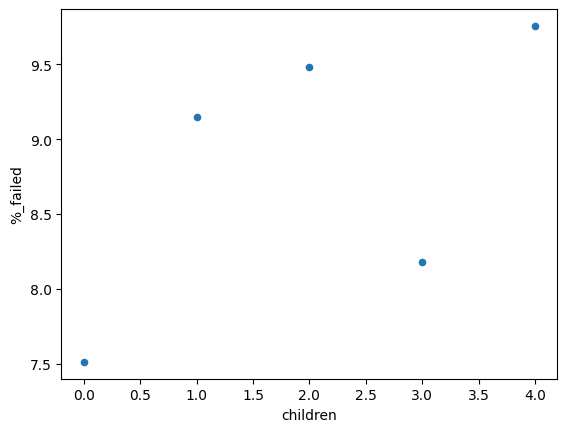

In [174]:
# Kita munculkan scatter plot untuk menentukan pengambilan keputusan dan menguji hipotesis
table[['%_failed']].reset_index().plot(kind='scatter', x = 'children', y = '%_failed')

**Kesimpulan**

Hasil kajian yang diperkuat dengan visual scatterplot membuktikan adanya hubungan positif antara jumlah anak dengan tingkat persentase gagal bayar seorang nasabah. Fenomena ini sekaligus membuktikan hipotesa awal kita yang bangun terkait adanya korelasi antara jumlah anak didalam suatu keluarga terhadap potensi gagal bayar pinjaman

## **5.2  Hipotesis II : Terdapat korelasi antara status keluarga dengan probabilitas melakukan gagal bayar pinjaman**

**Apakah terdapat korelasi antara status keluarga dengan probabilitas melakukan gagal bayar pinjaman?**

Hipotesa awal yang kita ajukan yaitu terdapat korelasi antara status keluarga terhadap kecenderungan untuk gagal bayar pinjaman

In [175]:
# Periksa data status keluarga dan data gagal bayar pinjaman
df_fams =  df[['family_status_group', 'debt']].reset_index()

# Hitung persentase gagal bayar berdasarkan status keluarga
table = pd.pivot_table(df_fams, values='index', index=['family_status_group'],
                    columns=['debt'], aggfunc='count')
table.reset_index()

debt,family_status_group,Failed,Not Failed
0,Cohabitation,388,3789
1,Married,931,11449
2,Single,422,4546


In [176]:
# Menambah kolom %_failed yang menunjukkan tingkat persentase gagal bayar untuk setiap status keluarga
table['%_failed'] = 100*table['Failed']/(table['Failed'] + table['Not Failed'])
table

debt,Failed,Not Failed,%_failed
family_status_group,,,
Cohabitation,388,3789,9.288963
Married,931,11449,7.520194
Single,422,4546,8.494364


<Axes: xlabel='family_status_group'>

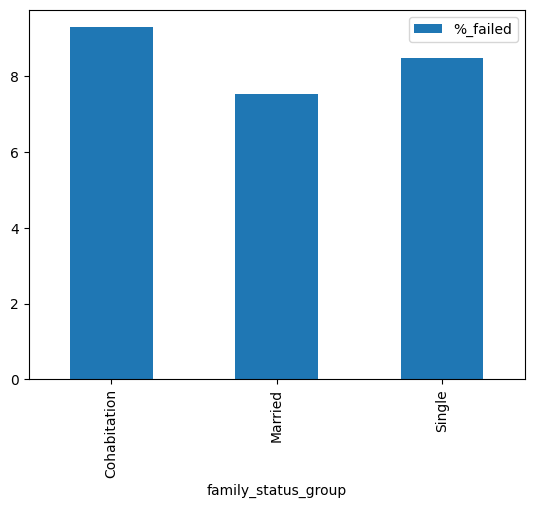

In [177]:
# Kita munculkan bar plot untuk menentukan pengambilan keputusan dan menguji hipotesis
table[['%_failed']].reset_index().plot(kind='bar', x = 'family_status_group', y = '%_failed')

## **5.3  Hipotesis III : Terdapat korelasi antara tingkat pendapatan dengan probabilitas melakukan gagal bayar pinjaman**

**Apakah terdapat korelasi antara tingkat pendapatan dengan probabilitas melakukan gagal bayar pinjaman?**

Hipotesis awal yang kita ajukan yaitu bahwa terdapat korelasi antara tingkat pendapatan seorang nasabah terhadap kecenderungan mereka untuk gagal bayar pinjaman.

In [178]:
# Periksa data tingkat pendapatan dan data gagal bayar pinjaman

df_inc = df[['total_income_group', 'debt']].reset_index()

# Kita gunakan pivot table untuk menghitung jumlah failed dan not failed untuk masing - masing tingkat pendapatan
table = pd.pivot_table(df_inc, values='index', index=['total_income_group'],
                    columns=['debt'], aggfunc='count')

# Menambah kolom %_failed yang menunjukkan tingkat persentase gagal bayar untuk setiap masing-masing tingkat pendapatan
table['%_failed'] = 100*table['Failed']/(table['Failed'] + table['Not Failed'])
table

debt,Failed,Not Failed,%_failed
total_income_group,,,
Lower-Income Range,1442,15814,8.356514
Middle-Income Range,294,3884,7.036860
Upper-Income Range,5,86,5.494505


<Axes: xlabel='total_income_group', ylabel='%_failed'>

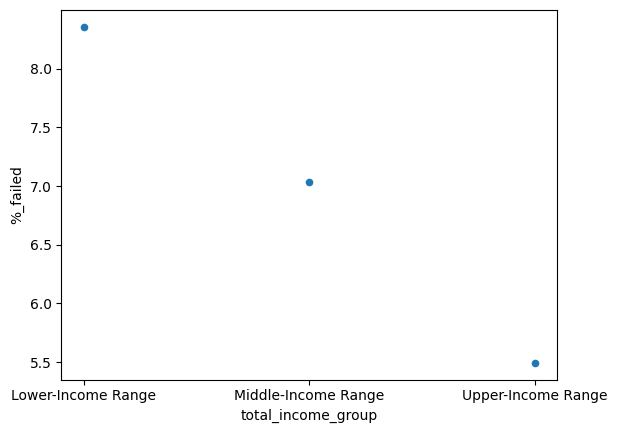

In [179]:
# Kita munculkan scatter plot untuk menentukan pengambilan keputusan dan menguji hipotesis
table[['%_failed']].reset_index().plot(kind='scatter', x = 'total_income_group', y = '%_failed')

**Kesimpulan**

Kita telah berhasil untuk membuktikan adanya korelasi antara tingkat pendapatan terhadap kecenderungan nasabah untuk gagal bayar pinjaman. Pola grafik membuktikan adanya hubungan positif, dimana semakin rendah tingkat pendapatan seseorang maka akan meningkatkan risiko gagal bayar mereka

## **5.4  Hipotesis IV : Terdapat korelasi antara tujuan kredit dalam memengaruhi persentase gagal bayar**

**Bagaimana tujuan kredit memengaruhi persentase gagal bayar?**

Hipotesis awal yang kita ajukan yaitu bahwa terdapat korelasi antara tujuan kredit seorang nasabah terhadap kecenderungan mereka untuk gagal bayar pinjaman

In [180]:
# Periksa data tujuan kredit dan data gagal bayar pinjaman
df_purpose =  df[['purpose_group', 'debt']].reset_index()

# Hitung persentase gagal bayar berdasarkan tujuan kredit
table = pd.pivot_table(df_purpose, values='index', index=['purpose_group'],
                    columns=['debt'], aggfunc='count')
table.reset_index()

debt,purpose_group,Failed,Not Failed
0,Ceremonial,186,2162
1,Education,370,3652
2,Mobility,403,3912
3,Property,782,10058


In [181]:
# Menambah kolom %_failed yang menunjukkan tingkat persentase gagal bayar untuk setiap data tujuan kredit
table['%_failed'] = 100*table['Failed']/(table['Failed'] + table['Not Failed'])
table

debt,Failed,Not Failed,%_failed
purpose_group,,,
Ceremonial,186,2162,7.921635
Education,370,3652,9.199403
Mobility,403,3912,9.339513
Property,782,10058,7.214022


<Axes: xlabel='purpose_group'>

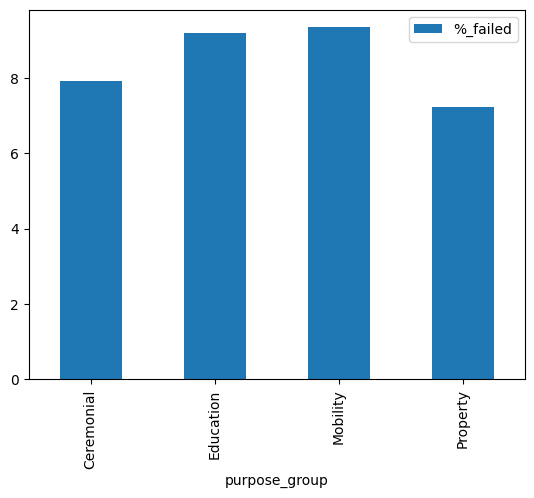

In [182]:
# Kita munculkan bar plot untuk menentukan pengambilan keputusan dan menguji hipotesis
table[['%_failed']].reset_index().plot(kind='bar', x = 'purpose_group', y = '%_failed')

**Kesimpulan**

Terdapat kecenderungan yang membuktikan adanya korelasi antara tujuan kredit seorang nasabah terhadap gagal bayar nasabah tersebut. Dimana secara historis persentase tertinggi untuk seorang nasabah dapat mengalami gagal bayar pinjaman adalah untuk tujuan kredit di 2 kategori, yaitu dana pinjaman pendidikan (Education) dan pembelian barang konsumtif semacam produk-produk kendaraan (Mobility). Sementara itu persentase terendah adalah untuk kategori pembelian aset produktif semacam property atau real estate

# **Tahap 6. Kesimpulan umum**

Kita telah menyelesaikan seluruh rangkaian proses analisa untuk mengukur Risiko Gagal Bayar Peminjam. Pada tahap Data Preprocessing seluruh nilai yang janggal untuk sejumlah kolom utama telah diperbaiki menggunakan pengaplikasian metode looping, replace, penyesuaian nilai yang hilang menggunakan *central tendency*, dan sejumlah metode lainnya. Setelah proses perbaikan nilai baris data, tahap selanjutnya yaitu berkaitan dengan proses pengklasifikasian data terhadap kolom - kolom yang relevan untuk menjawab seluruh hipotesis yang telah diajukan, yaitu untuk variabel family_status, total_income, dan purpose. Seluruh rangkaian penyesuaian nilai baris data dan pengklasifikasian bermuara pada satu upaya yang berkaitan dengan menjawab sejumlah hipotesa yang telah diajukan di awal project, dimana berikut adalah hasil yang dapat kita rangkum :
1. Terbukti adanya korelasi antara jumlah anak dalam suatu keluarga terhadap probabilitas gagal bayar pinjaman
2. Terbukti adanya korelasi antara status keluarga terhadap probabilitas gagal bayar pinjaman
3. Terbukti adanya korelasi antara tingkat penghasilan nasabah terhadap probabilitas gagal bayar pinjaman
4. Terbukti adanya korelasi antara tujuan pengambilan kredit terhadap probabilitas gagal bayar pinjaman